Cyna Shirazinejad, 7/7/21

# Notebook 15: analyze scission-present ARPC3+ CCPs, 'zero' padding

outline:
* comparison of lifetimes of ARPC3+/- CCPs
* comparison of aligned intensities of ARPC3+/- CCPs

##### import all necessary Python modules

In [105]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from IPython.display import Image
import seaborn as sns
unique_user_path_notebook = str(np.load('unique_user_path_notebook.npy'))
unique_user_saved_outputs = str(np.load('unique_user_saved_outputs.npy'))
sys.path.append(unique_user_path_notebook+'/cmeAnalysisPostProcessingPythonScripts') # add custom Python scripts to the local path
import generate_index_dictionary
import display_tracks
import return_track_attributes
index_dictionary = generate_index_dictionary.return_index_dictionary()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load files

In [3]:
df_merged_features = pd.read_csv(unique_user_saved_outputs+'/dataframes/df_new_incorporated_data_merged_features.zip')
df_pcs_normal_scaled_with_gmm_cluster = pd.read_csv(unique_user_saved_outputs+'/dataframes/df_new_incorporated_data_pcs_gmm_clusters.zip')

with open(unique_user_saved_outputs+'/dataframes/merged_ap2arpc3_data_zeropadding', 'rb') as f:
    merged_results = pickle.load(f)  

    
sig_arpc3_dnm2_peak = merged_results['significant_arpc3_at_dnm2_peak_arpc3_positive']
indices_sig_arpc3_dnm2_peak = np.where(np.array(sig_arpc3_dnm2_peak)==1)[0]

ccps_arpc3_negative = np.load(unique_user_saved_outputs+'/dataframes/ccps_arpc3_negative_zeropadding.npy', allow_pickle=True)
    
ccps_arpc3_positive = np.load(unique_user_saved_outputs+'/dataframes/ccps_arpc3_positive_zeropadding.npy', allow_pickle=True)[indices_sig_arpc3_dnm2_peak]
    
ap2_lifetime_arpc3_negative = merged_results['ap2_lifetime_arpc3_negative']
ap2_lifetime_arpc3_positive = np.array(merged_results['ap2_lifetime_arpc3_positive'])[indices_sig_arpc3_dnm2_peak]
time_ap2_appearance_to_dnm2_peak_arpc3_negative = merged_results['time_ap2_appearance_to_dnm2_peak_arpc3_negative']
time_ap2_appearance_to_dnm2_peak_arpc3_positive = np.array(merged_results['time_ap2_appearance_to_dnm2_peak_arpc3_positive'])[indices_sig_arpc3_dnm2_peak]
time_arpc3_appearance_to_dnm2_peak_arpc3_positive = np.array(merged_results['time_arpc3_appearance_to_dnm2_peak_arpc3_positive'])[indices_sig_arpc3_dnm2_peak]
arpc3_lifetime_arpc3_positive = np.array(merged_results['arpc3_lifetime_arpc3_positive'])[indices_sig_arpc3_dnm2_peak]

In [4]:
merged_results.keys()

dict_keys(['ch0_vectors_arpc3_positive', 'ch1_vectors_arpc3_positive', 'ch2_vectors_arpc3_positive', 'channel_0_1_separations_arpc3_positive', 'channel_0_2_separations_arpc3_positive', 'channel_1_2_separations_arpc3_positive', 'final_separations_ap2arpc3_arpc3_positive', 'initial_separations_ap2arpc3_arpc3_positive', 'ap2_arpc3_separation_at_dnm2_peak_arpc3_positive', 'ap2_arpc3_separation_at_arpc3_peak_arpc3_positive', 'ap2_arpc3_separation_at_ap2_peak_arpc3_positive', 'ap2_lifetime_arpc3_positive', 'arpc3_lifetime_arpc3_positive', 'max_separation_ap2_arpc3_arpc3_positive', 'max_separation_ap2_dnm2_arpc3_positive', 'max_separation_dnm2_arpc3_arpc3_positive', 'num_frames_associated_arpc3_positive', 'time_ap2_appearance_to_dnm2_peak_arpc3_positive', 'maximum_ap2_intensity_arpc3_positive', 'maximum_dnm2_intensity_arpc3_positive', 'maximum_arpc3_intensity_arpc3_positive', 'pval_arpc3_ccps_arpc3_positive', 'time_arpc3_appearance_to_dnm2_peak_arpc3_positive', 'fraction_arpc3_positive', 'ccp

In [5]:
len(sig_arpc3_dnm2_peak), len(indices_sig_arpc3_dnm2_peak)

(2042, 1385)

# AP2 lifetimes of ARPC3+/- events

In [6]:
%%capture

plt.rcParams['figure.dpi']=500
plt.rcParams['figure.figsize']=(3,2)
plt.hist(ap2_lifetime_arpc3_negative, alpha=0.2, label='ARPC3 -', bins='auto', density=True)
plt.hist(ap2_lifetime_arpc3_positive, alpha=0.2, label='ARPC3 +', bins='auto', density=True)
plt.rcParams.update({'font.size': 5})
plt.xlabel('lifetime (s)')
plt.ylabel('frequency density')
plt.title('AP2 lifetimes, ARPC3 +/-'+
          '\nmean +/- std. of ARPC3 recruitment at CCPs:\n' + 
          str(np.around(100*np.mean(merged_results['fraction_arpc3_positive']),3)) + '% +/- ' +
          str(np.around(100*np.std(merged_results['fraction_arpc3_positive']),3)) + '%' + 
          '\ntotal number of CCPs- ARPC3+: ' + "{:,}".format(len(ap2_lifetime_arpc3_positive)) + 
          ', ARPC3-: ' + "{:,}".format(len(ap2_lifetime_arpc3_negative)))
plt.legend()
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/ap2lifetimes_plusminus_arpc3_histogram_density_sigdnm2peak_zeropadding.png')

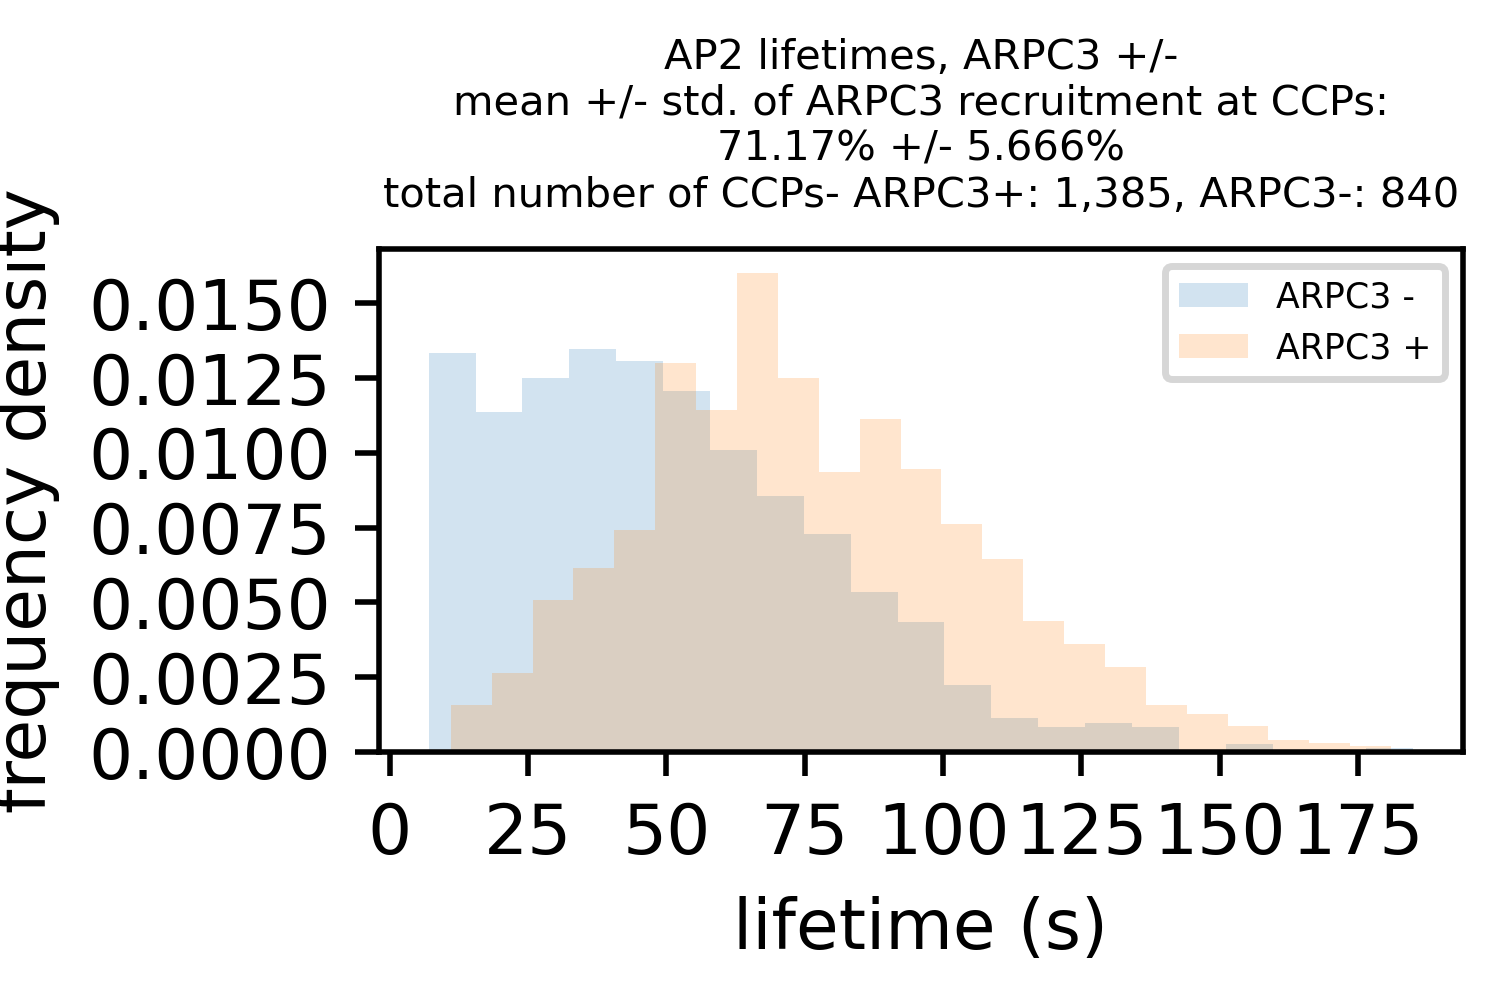

In [7]:
Image(filename=unique_user_saved_outputs+'/plots/ap2lifetimes_plusminus_arpc3_histogram_density_sigdnm2peak_zeropadding.png', height=500, width=500)

# CCP lifetimes (AP2 initiation to DNM2 peak) of ARPC3+/- events

In [46]:
%%capture

plt.rcParams['figure.dpi']=500
plt.rcParams['figure.figsize']=(3,2)
plt.hist(time_ap2_appearance_to_dnm2_peak_arpc3_negative, alpha=0.2, label='ARPC3 -', bins='auto', density=True)
plt.hist(time_ap2_appearance_to_dnm2_peak_arpc3_positive, alpha=0.2, label='ARPC3 +', bins='auto', density=True)
plt.rcParams.update({'font.size': 5})
plt.xlabel('lifetime (s)')
plt.ylabel('frequency density')
plt.title('CCP lifetimes, ARPC3 +/-'+
          '\nmean +/- std. of ARPC3 recruitment at CCPs:\n' + 
          str(np.around(100*np.mean(merged_results['fraction_arpc3_positive']),3)) + '% +/- ' +
          str(np.around(100*np.std(merged_results['fraction_arpc3_positive']),3)) + '%' + 
          '\ntotal number of CCPs- ARPC3+: ' + "{:,}".format(len(time_ap2_appearance_to_dnm2_peak_arpc3_positive)) + 
          ', ARPC3-: ' + "{:,}".format(len(time_ap2_appearance_to_dnm2_peak_arpc3_negative)))
plt.legend()
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/fig_4a_ccplifetimes_plusminus_arpc3_histogram_density_sigdnm2peak_zeropadding.png')

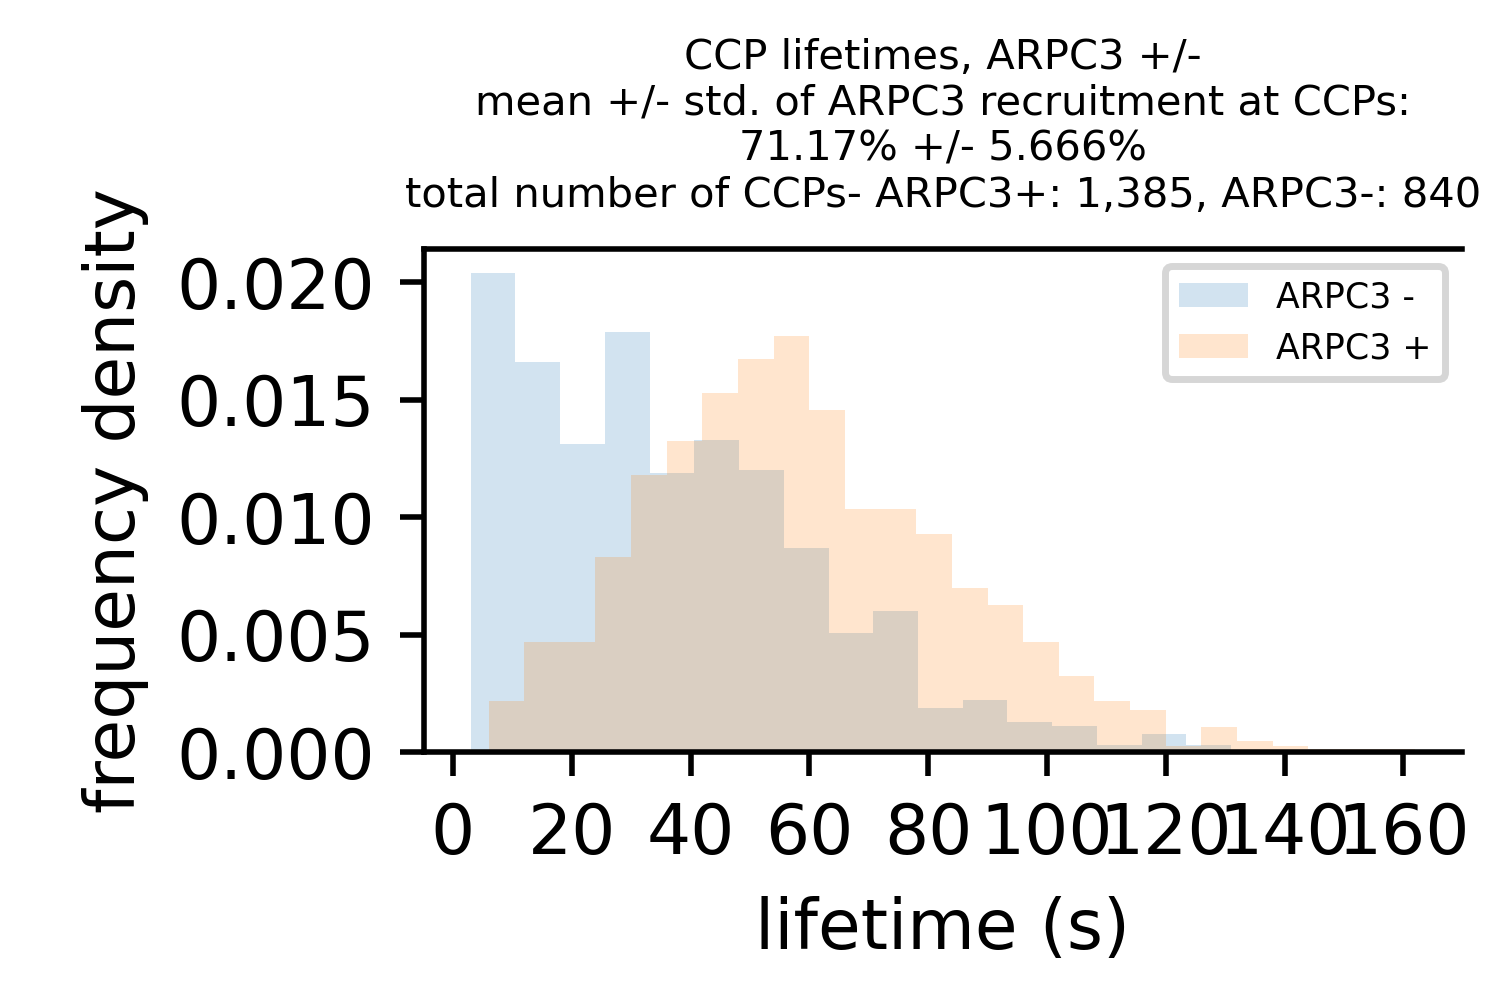

In [47]:
Image(filename=unique_user_saved_outputs+'/plots/fig_4a_ccplifetimes_plusminus_arpc3_histogram_density_sigdnm2peak_zeropadding.png', height=500, width=500)

# histogram of ARPC3 lifetimes

In [42]:
%%capture

plt.style.use('default')

plt.rcParams["figure.dpi"]=500
plt.rcParams["figure.figsize"]=(5,4)

plt.hist(time_arpc3_appearance_to_dnm2_peak_arpc3_positive,
         bins='auto',
         alpha=1,
         density=True,
         label='ARPC3 lifetime',
         color='blue')

plt.legend(loc='upper right', framealpha=1)
plt.xlabel('time (s)')
plt.ylabel('frequency density')
plt.title('ARPC3+ events'+
          '\nmean +/- std. of ARPC3 recruitment at CCPs:\n ' + 
          str(np.around(100*np.mean(merged_results['fraction_arpc3_positive']),3)) + '% +/- ' +
          str(np.around(100*np.std(merged_results['fraction_arpc3_positive']),3)) + '%' + 
          '\ntotal number of CCPs-- ARPC3+: ' + "{:,}".format(len(time_ap2_appearance_to_dnm2_peak_arpc3_positive)))
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/fig_3c_arpc3_lifetimes_sigdnm2peak_zeropadding.png')

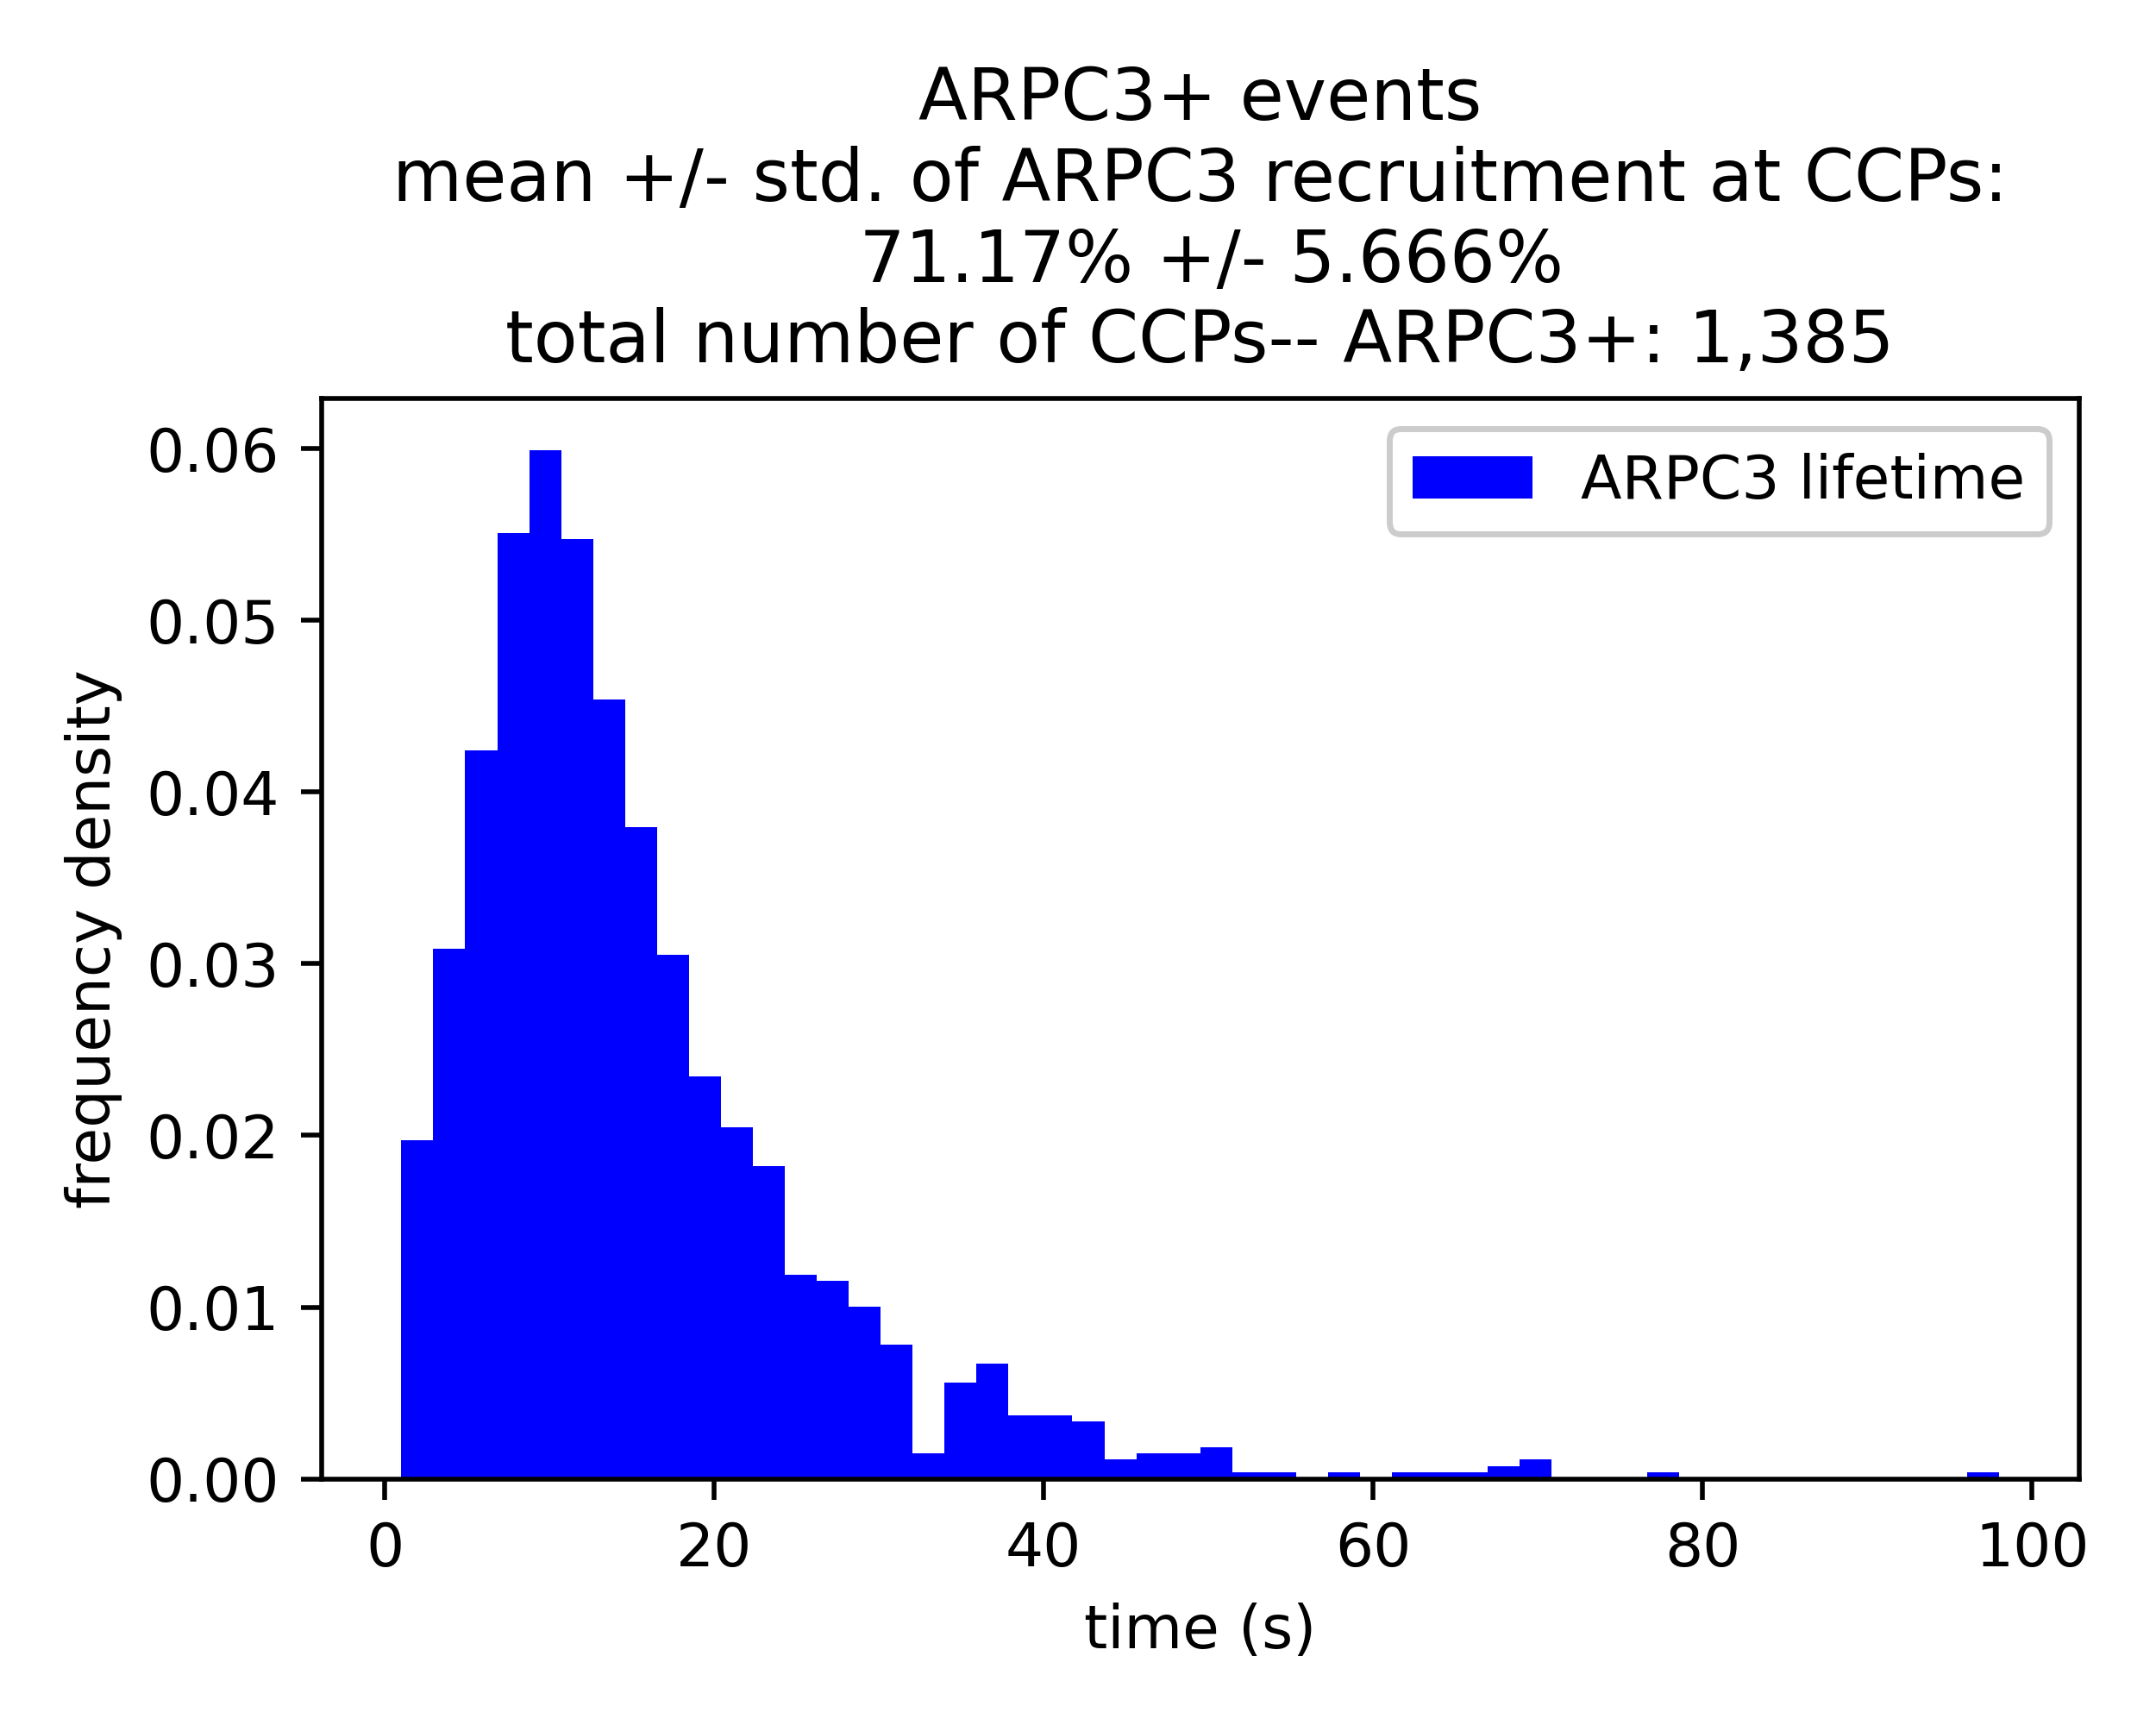

In [43]:
Image(filename=unique_user_saved_outputs+'/plots/fig_3c_arpc3_lifetimes_sigdnm2peak_zeropadding.png', height=500, width=500)

# ECDF of AP2 and CCP lifetimes, merged view

In [12]:
%%capture

plt.style.use('default')

plt.rcParams["figure.dpi"]=500
plt.rcParams["figure.figsize"]=(7,4)


plt.hist(time_ap2_appearance_to_dnm2_peak_arpc3_negative,
         bins='auto',
         alpha=1,
         density=True,
         histtype='step', 
         cumulative=True,
         label='ARPC3-, CCP lifetime',
         color='blue',
         linestyle='dashed')
plt.hist(time_ap2_appearance_to_dnm2_peak_arpc3_positive,
         bins='auto',
         alpha=1,
         density=True,
         histtype='step', 
         cumulative=True,
         label='ARPC3+, CCP lifetime',
         color='orange',
         linestyle='dashed')
plt.hist(ap2_lifetime_arpc3_negative,
         bins='auto',
         alpha=1,
         density=True,
         histtype='step', 
         cumulative=True,
         label='ARPC3-, AP2 lifetime',
         color='blue',
         linewidth=3)
plt.hist(ap2_lifetime_arpc3_positive,
         bins='auto',
         alpha=1,
         density=True,
         histtype='step', 
         cumulative=True,
         label='ARPC3+, AP2 lifetime',
         color='orange',
         linewidth=3)
plt.hist(time_arpc3_appearance_to_dnm2_peak_arpc3_positive,
         bins='auto',
         alpha=1,
         density=True,
         histtype='step', 
         cumulative=True,
         label='ARPC3 initiation-to-scission',
         color='pink',
         linewidth=3,
         linestyle='dashed')
plt.hist(arpc3_lifetime_arpc3_positive,
         bins='auto',
         alpha=1,
         density=True,
         histtype='step', 
         cumulative=True,
         label='ARPC3 lifetime',
         color='pink',
         linewidth=3)
plt.legend(loc='lower right', framealpha=1)
plt.xlabel('time (s)')
plt.ylabel('cumulative frequency')
plt.title('CCP events'+
          '\nmean +/- std. of ARPC3 recruitment at CCPs:\n ' + 
          str(np.around(100*np.mean(merged_results['fraction_arpc3_positive']),3)) + '% +/- ' +
          str(np.around(100*np.std(merged_results['fraction_arpc3_positive']),3)) + '%' + 
          '\ntotal number of CCPs-- ARPC3+: ' + "{:,}".format(len(time_ap2_appearance_to_dnm2_peak_arpc3_positive)) + 
          ', ARPC3-: ' + "{:,}".format(len(time_ap2_appearance_to_dnm2_peak_arpc3_negative)))
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/merged_lifetimes_arpc3_ecdfs_sigdnm2peak_zeropadding.png')

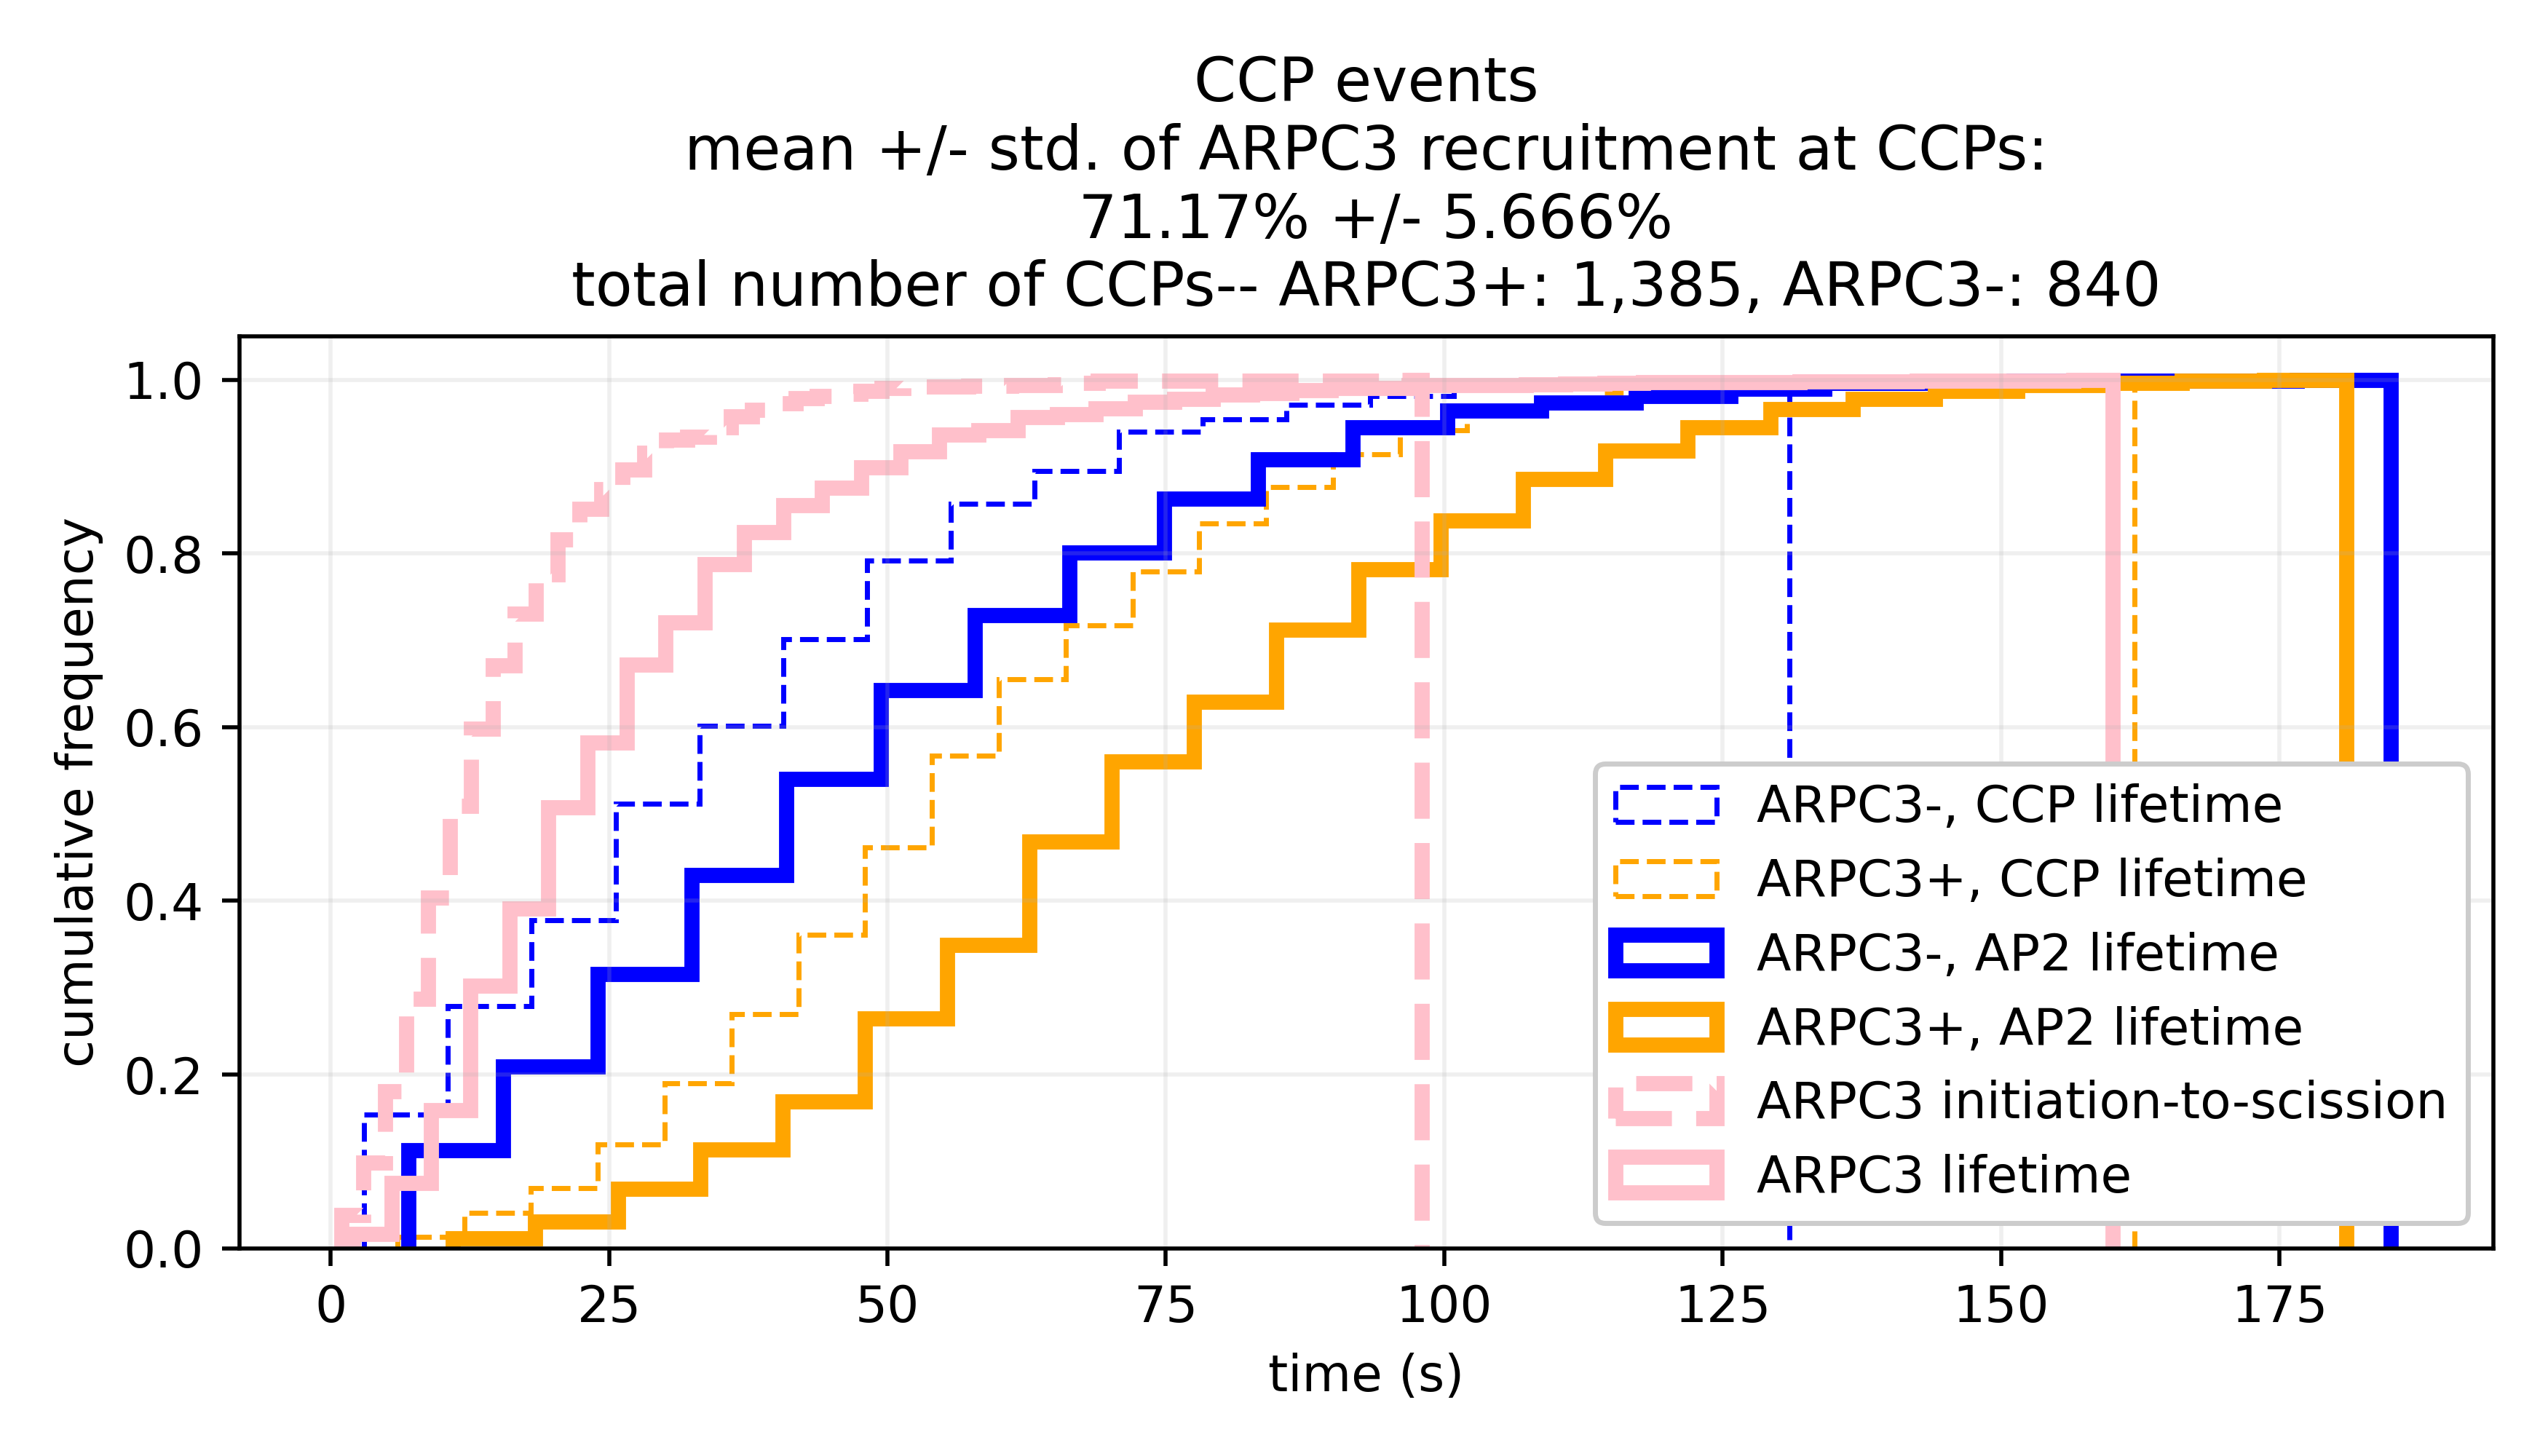

In [13]:
Image(filename=unique_user_saved_outputs+'/plots/merged_lifetimes_arpc3_ecdfs_sigdnm2peak_zeropadding.png', height=500, width=500)

# merge amplitudes of different channels

In [14]:
channel_amplitudes_arpc3_negative = []
for i in range(len(merged_results['ch0_vectors_arpc3_negative'])):
    channel_amplitudes_arpc3_negative.append([merged_results['ch0_vectors_arpc3_negative'][i],
                                              merged_results['ch1_vectors_arpc3_negative'][i],
                                              merged_results['channel_0_1_separations_arpc3_negative'][i]])

channel_amplitudes_arpc3_positive = []
for i in range(len(merged_results['ch0_vectors_arpc3_positive'])):
    channel_amplitudes_arpc3_positive.append([merged_results['ch0_vectors_arpc3_positive'][i],
                                              merged_results['ch1_vectors_arpc3_positive'][i],
                                              merged_results['ch2_vectors_arpc3_positive'][i],
                                              merged_results['channel_0_1_separations_arpc3_positive'][i],
                                              merged_results['channel_0_2_separations_arpc3_positive'][i]])
channel_amplitudes_arpc3_positive = np.array(channel_amplitudes_arpc3_positive)[indices_sig_arpc3_dnm2_peak]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


# cohort plots of ARPC3+ CCPs

In [54]:
max(ap2_lifetime_arpc3_positive)

181

In [59]:
%%capture

plt.style.use('default')

fig, axes = plt.subplots(1, 1, dpi=500, figsize=(15,5))
# axes_separation = axes.twinx()

cohorts = [[min(ap2_lifetime_arpc3_positive),40],[40,60],[60,80],[80,193]]

offsets, num_in_cohort, max_dnm2_cohort_indices = display_tracks.plot_separated_cohorts([axes], 
                                                                         channel_amplitudes_arpc3_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'ARPC3'],
                                                                         ['m', 'g', 'b'])

lines_0, labels_0 = axes.get_legend_handles_labels()
axes.legend(lines_0, labels_0, 
            loc='upper center', 
            bbox_to_anchor=(0.88, 0.8), 
            title="{:,}".format(len(channel_amplitudes_arpc3_positive)) + ' total events')

y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)

text_horizontal_shifts = 3
text_percentage_y = 540
text_bounds_y = 560

for i in range(len(cohorts)):

    if i==0:
        axes.text(text_horizontal_shifts, text_bounds_y, '$\mathregular{lifetime <}$'+str(cohorts[i][1])+' s', fontsize=8)
        axes.text(text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes_arpc3_positive)) + '%')
    elif i==len(cohorts)-1:
        axes.text(offsets[i]+text_horizontal_shifts, text_bounds_y, '$\mathregular{lifetime >}$'+str(cohorts[i][0])+' s', fontsize=8)
        axes.text(offsets[i]+text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes_arpc3_positive)) + '%')
    else:
        axes.text(offsets[i]+text_horizontal_shifts, text_bounds_y, str(cohorts[i][0])+'$\mathregular{s \leq lifetime <}$'+str(cohorts[i][1])+' s', fontsize=8)
        axes.text(offsets[i]+text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes_arpc3_positive)) + '%')
        
x_positions_ticks = []
x_labels_ticks = []
max_ticks_per_cohort = [[1, 1], [2, 2], [3, 3], [6, 3]]

for i in range(len(max_dnm2_cohort_indices)):
    

    num_ticks_before = np.min((int(np.floor((max_dnm2_cohort_indices[i])/10)),max_ticks_per_cohort[i][0]))
    num_ticks_after = np.min((int(np.ceil((cohorts[i][1]-max_dnm2_cohort_indices[i])/10)-1),max_ticks_per_cohort[i][1]))
    for j in range(num_ticks_before):
        
        x_labels_ticks.append(-10*(j+1))
        x_positions_ticks.append(-10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])
    
    x_labels_ticks.append(0)
    x_positions_ticks.append(offsets[i] + max_dnm2_cohort_indices[i])
    
    for j in range(num_ticks_after):
        
        x_labels_ticks.append(10*(j+1))
        x_positions_ticks.append(10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])


axes.set_xticks(0.5+np.array(x_positions_ticks), minor=False)
axes.set_xticklabels(x_labels_ticks, minor=False)


axes.set_xlabel('time (s)') 
axes.set_ylabel('a.u. fluorescence')
axes.set_title('ARPC3+ CCPs, aligned to DNM2 peaks, binned in cohorts by AP2 lifetimes')
axes.set_xlim([0,offsets[-1]+cohorts[-1][-1]])    
axes.set_ylim([0,600])  
# axes_separation.set_ylim([0,.3])
plt.tight_layout()   
plt.savefig(unique_user_saved_outputs+'/plots/fig3ab_all_overlaid_ap2dnm2_arpc3plusccps_cohorts_centered_zero_sigdnm2peak_zeropadding.png')

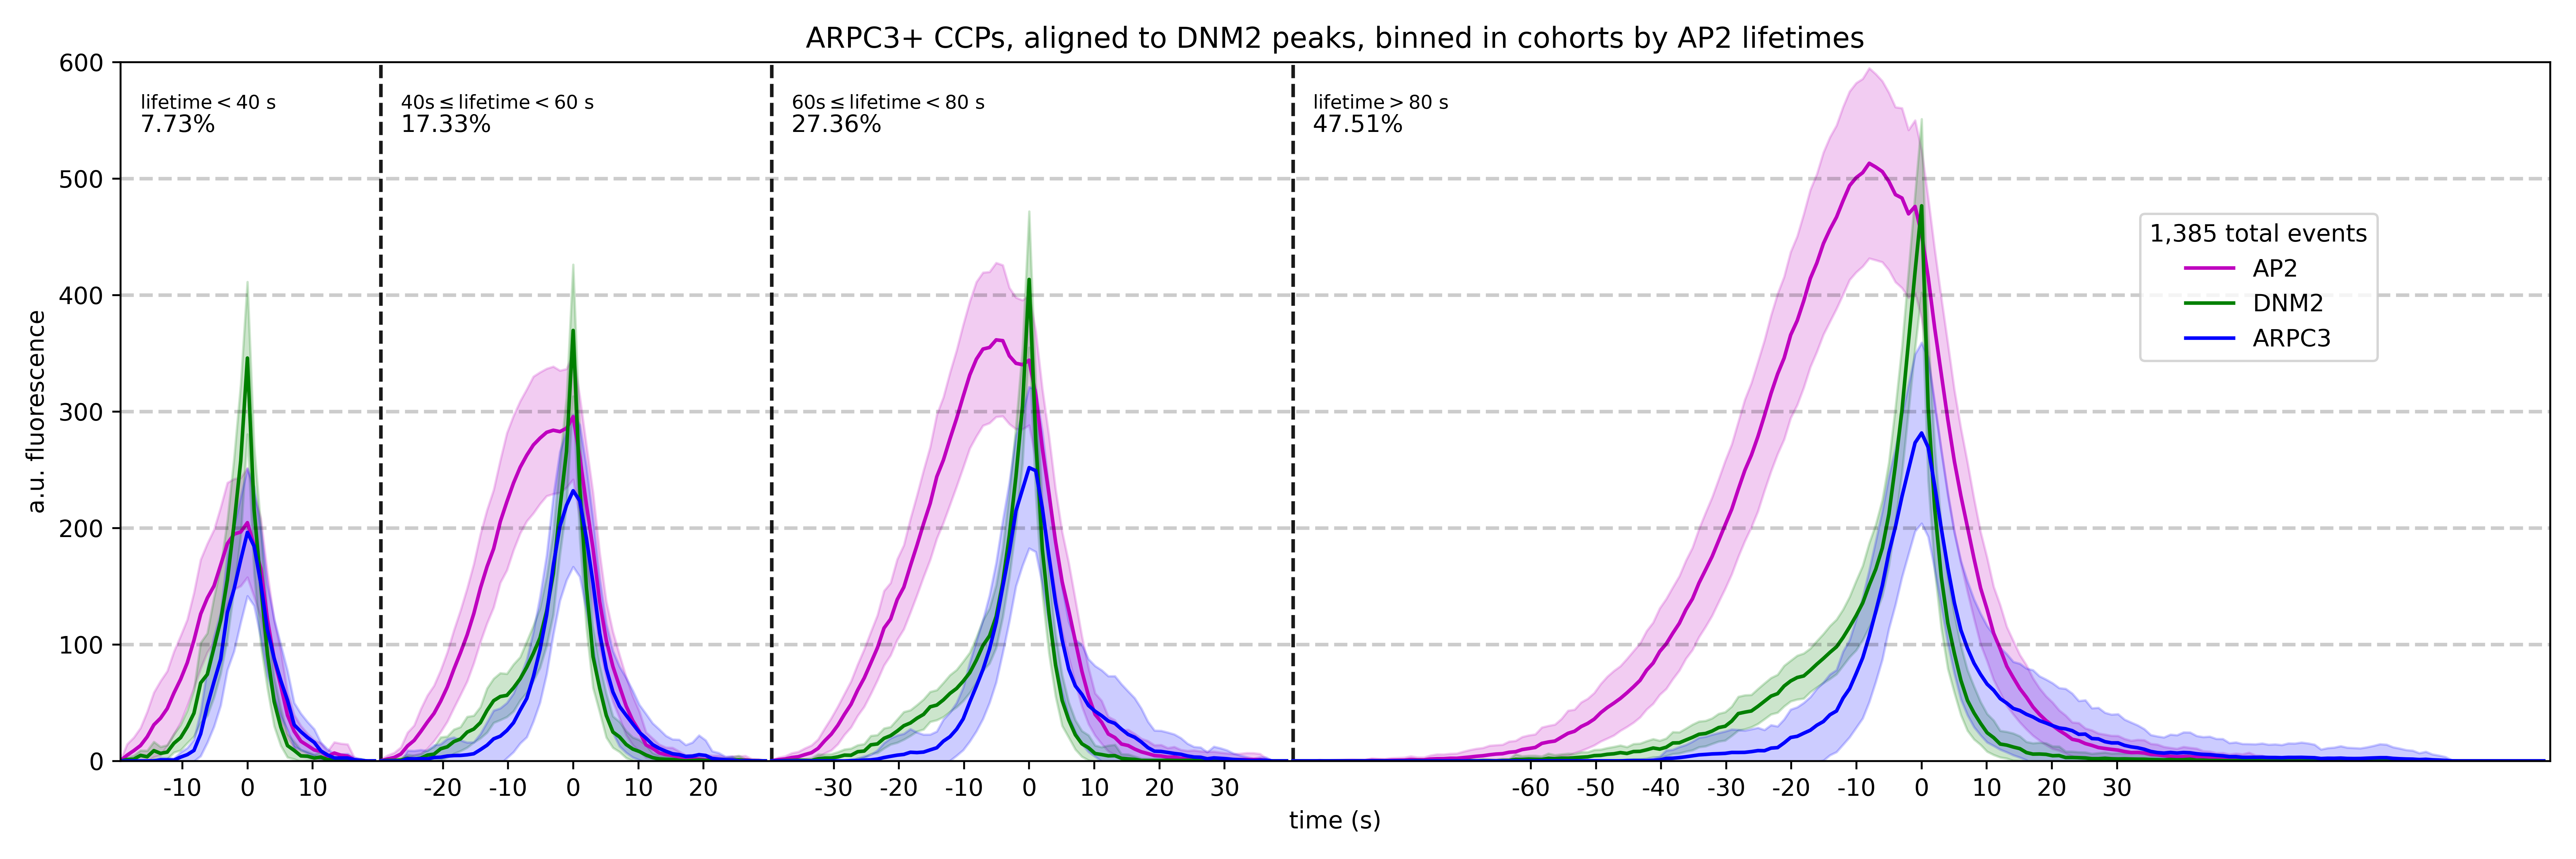

In [60]:
Image(filename=unique_user_saved_outputs+'/plots/fig3ab_all_overlaid_ap2dnm2_arpc3plusccps_cohorts_centered_zero_sigdnm2peak_zeropadding.png', height=500, width=500)

# ARPC3+ cohort with AP2/DNM2 and AP2/ARPC3 separation

In [44]:
%%capture

plt.style.use('default')
plt.rcParams['axes.spines.right'] = False

fig, axes = plt.subplots(1, 1, dpi=500, figsize=(6,4))
axes_separation = axes.twinx()

cohorts = [[min(ap2_lifetime_arpc3_positive), max(ap2_lifetime_arpc3_positive)]]

offsets, num_in_cohort, max_dnm2_cohort_indices = display_tracks.plot_separated_cohorts([axes, axes_separation], 
                                                                         channel_amplitudes_arpc3_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [3, 4], 
                                                                         ['AP2', 'DNM2', 'ARPC3', 'AP2-DNM2', 'AP2-ARPC3'],
                                                                         ['m', 'g', 'b', 'g', 'b'],
                                                                         line_cutoff_index=[3, 4],
                                                                         line_cutoff_regions=[[], [], [], [[0, 88-10], [88+5, 120]], [[0, 88-10], [88+5, 120]]])

lines_0, labels_0 = axes.get_legend_handles_labels()
lines_1, labels_1 = axes_separation.get_legend_handles_labels()
axes.legend(lines_0+lines_1, labels_0+labels_1, 
            loc='upper right',
            title="{:,}".format(len(channel_amplitudes_arpc3_positive)) + ' total events')
y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)


x_positions_ticks = []
x_labels_ticks = []
max_ticks_per_cohort = [[3, 2]]

for i in range(len(max_dnm2_cohort_indices)):
    

    num_ticks_before = np.min((int(np.floor((max_dnm2_cohort_indices[i])/10)),max_ticks_per_cohort[i][0]))
    num_ticks_after = np.min((int(np.ceil((cohorts[i][1]-max_dnm2_cohort_indices[i])/10)-1),max_ticks_per_cohort[i][1]))
    
    for j in range(num_ticks_before):
        
        x_labels_ticks.append(-10*(j+1))
        x_positions_ticks.append(-10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])
    
    x_labels_ticks.append(0)
    x_positions_ticks.append(offsets[i] + max_dnm2_cohort_indices[i])
    
    for j in range(num_ticks_after):
        
        x_labels_ticks.append(10*(j+1))
        x_positions_ticks.append(10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])


axes.set_xticks(0.5+np.array(x_positions_ticks), minor=False)
axes.set_xticklabels(x_labels_ticks, minor=False)


axes.set_xlabel('time (s)') 
axes.set_ylabel('a.u. fluorescence')
axes.set_title('ARPC3+ CCPs, aligned to DNM2 peaks')
axes.set_xlim([50,120])    
axes.set_ylim([0,530])
axes_separation.set_ylim([0,0.5])
axes_separation.set_ylabel('separation (microns)')
axes.axvline(120, color='black', linewidth=5, linestyle='--')
plt.tight_layout()   
plt.savefig(unique_user_saved_outputs+'/plots/fig_3d_all_overlaid_ap2dnm2_arpc3plusccps_cohorts_overlaid_separation_zeropadding_sig.png')

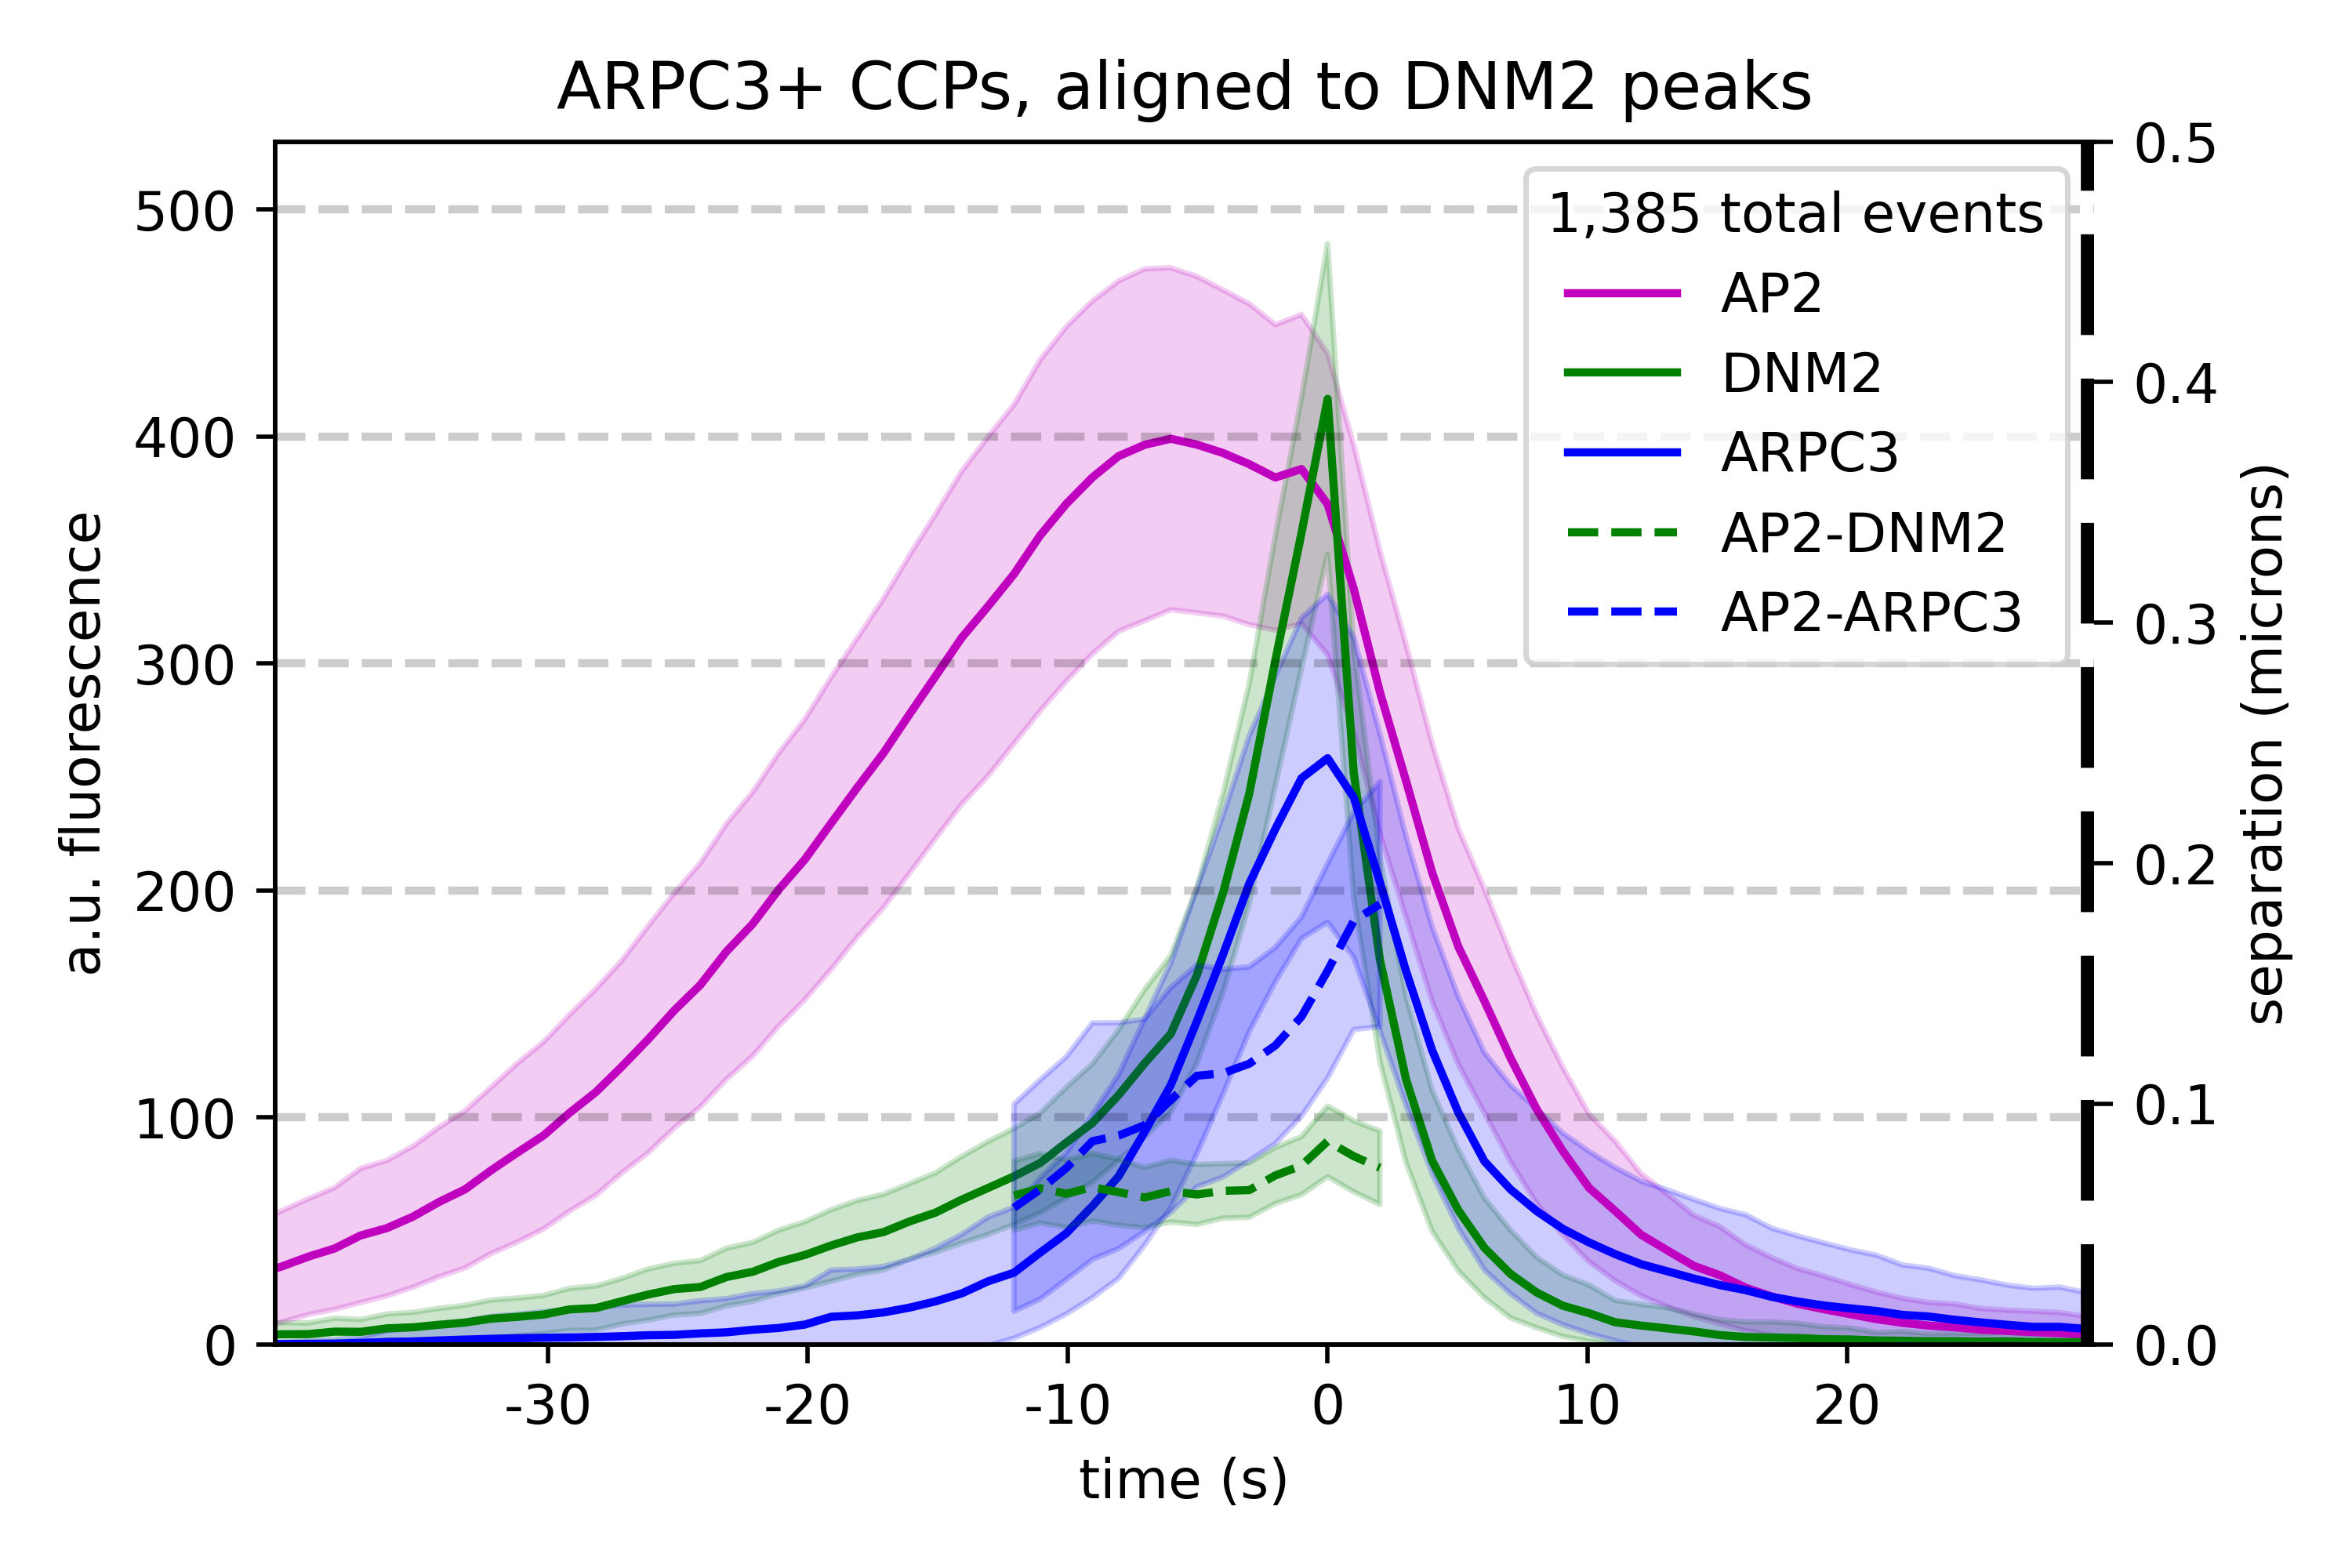

In [45]:
Image(filename=unique_user_saved_outputs+'/plots/fig_3d_all_overlaid_ap2dnm2_arpc3plusccps_cohorts_overlaid_separation_zeropadding_sig.png', height=500, width=500)

### comparing ARPC3+/- aligned intensities

In [48]:
%%capture

plt.style.use('default')
plt.rcParams['axes.spines.right'] = True

fig, (axes_0, axes_1) = plt.subplots(2, 1, dpi=500, figsize=(6,8), gridspec_kw=dict(height_ratios=[1,1]))


cohorts = [[min(ap2_lifetime_arpc3_negative), max(ap2_lifetime_arpc3_negative)]]

_, _, max_dnm2_cohort_indices_0 = display_tracks.plot_separated_cohorts([axes_0], 
                                                                         channel_amplitudes_arpc3_negative, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1], 
                                                                         [], 
                                                                         ['AP2', 'DNM2'],
                                                                         ['m', 'g'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], [], [], []],
                                                                         horizontal_shift_index=[0, 1], 
                                                                         horizontal_shift=[-92, -92, -92])

cohorts = [[min(ap2_lifetime_arpc3_positive), max(ap2_lifetime_arpc3_positive)]]


offsets, num_in_cohort, max_dnm2_cohort_indices_1 = display_tracks.plot_separated_cohorts([axes_1], 
                                                                         channel_amplitudes_arpc3_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'ARPC3'],
                                                                         ['m', 'g', 'b'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], []],
                                                                         horizontal_shift_index=[0, 1, 2], 
                                                                         horizontal_shift=[-88, -88, -88])                                                                           


lines_0, labels_0 = axes_1.get_legend_handles_labels()
# lines_1, labels_1 = axes_separation_0.get_legend_handles_labels()

axes_0.legend(lines_0, labels_0, 
            loc='upper right')

y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes_0.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)
    axes_1.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)

axes_1.set_xlabel('time (s)') 
axes_0.set_xlim([-30, 20]) 
axes_1.set_xlim([-30, 20]) 
axes_0.set_ylim([0,530])
axes_1.set_ylim([0,530])
# axes_separation_0.set_ylim([0,0.5])
# axes_separation_1.set_ylim([0,0.5])

axes_1.set_yticks([0,100,200,300,400, 500], minor=False)
axes_1.set_yticklabels([0,100,200,300, 400, 500], minor=False)
axes_0.set_yticks([0,100,200,300,400, 500], minor=False)
axes_0.set_yticklabels([0,100,200,300,400, 500], minor=False)

# axes_separation_1.set_yticks([0, 0.1, 0.2, 0.3, 0.4], minor=False)
# axes_separation_1.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], minor=False)
# axes_separation_0.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], minor=False)
# axes_separation_0.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5], minor=False)

plt.setp(axes_0.get_xticklabels(), visible=False)
yticks = axes_1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
plt.subplots_adjust(hspace=.0)

# axes_0.axvline(20, color='black', linewidth=5, linestyle=)
# axes_1.axvline(20, color='black', linewidth=5, linestyle='--')

axes_0.text(-36,0, 'a.u. fluorescence', rotation="vertical", va="center", fontsize=10);
# axes_0.text(24,0, 'separation (microns)', rotation=270, va="center", fontsize=10);

axes_1.set_xticks(0.5+np.array([-20, -10, 0, 10]), minor=False)
axes_1.set_xticklabels([-20, -10, 0, 10], minor=False)

axes_0.set_title('cohorts of ARPC3+/- events')

plt.savefig(unique_user_saved_outputs+'/plots/fig_4b_all_overlaid_cohorts_sigdnm2peak_stacked_arpc3_no_distance_zeropadding.png')

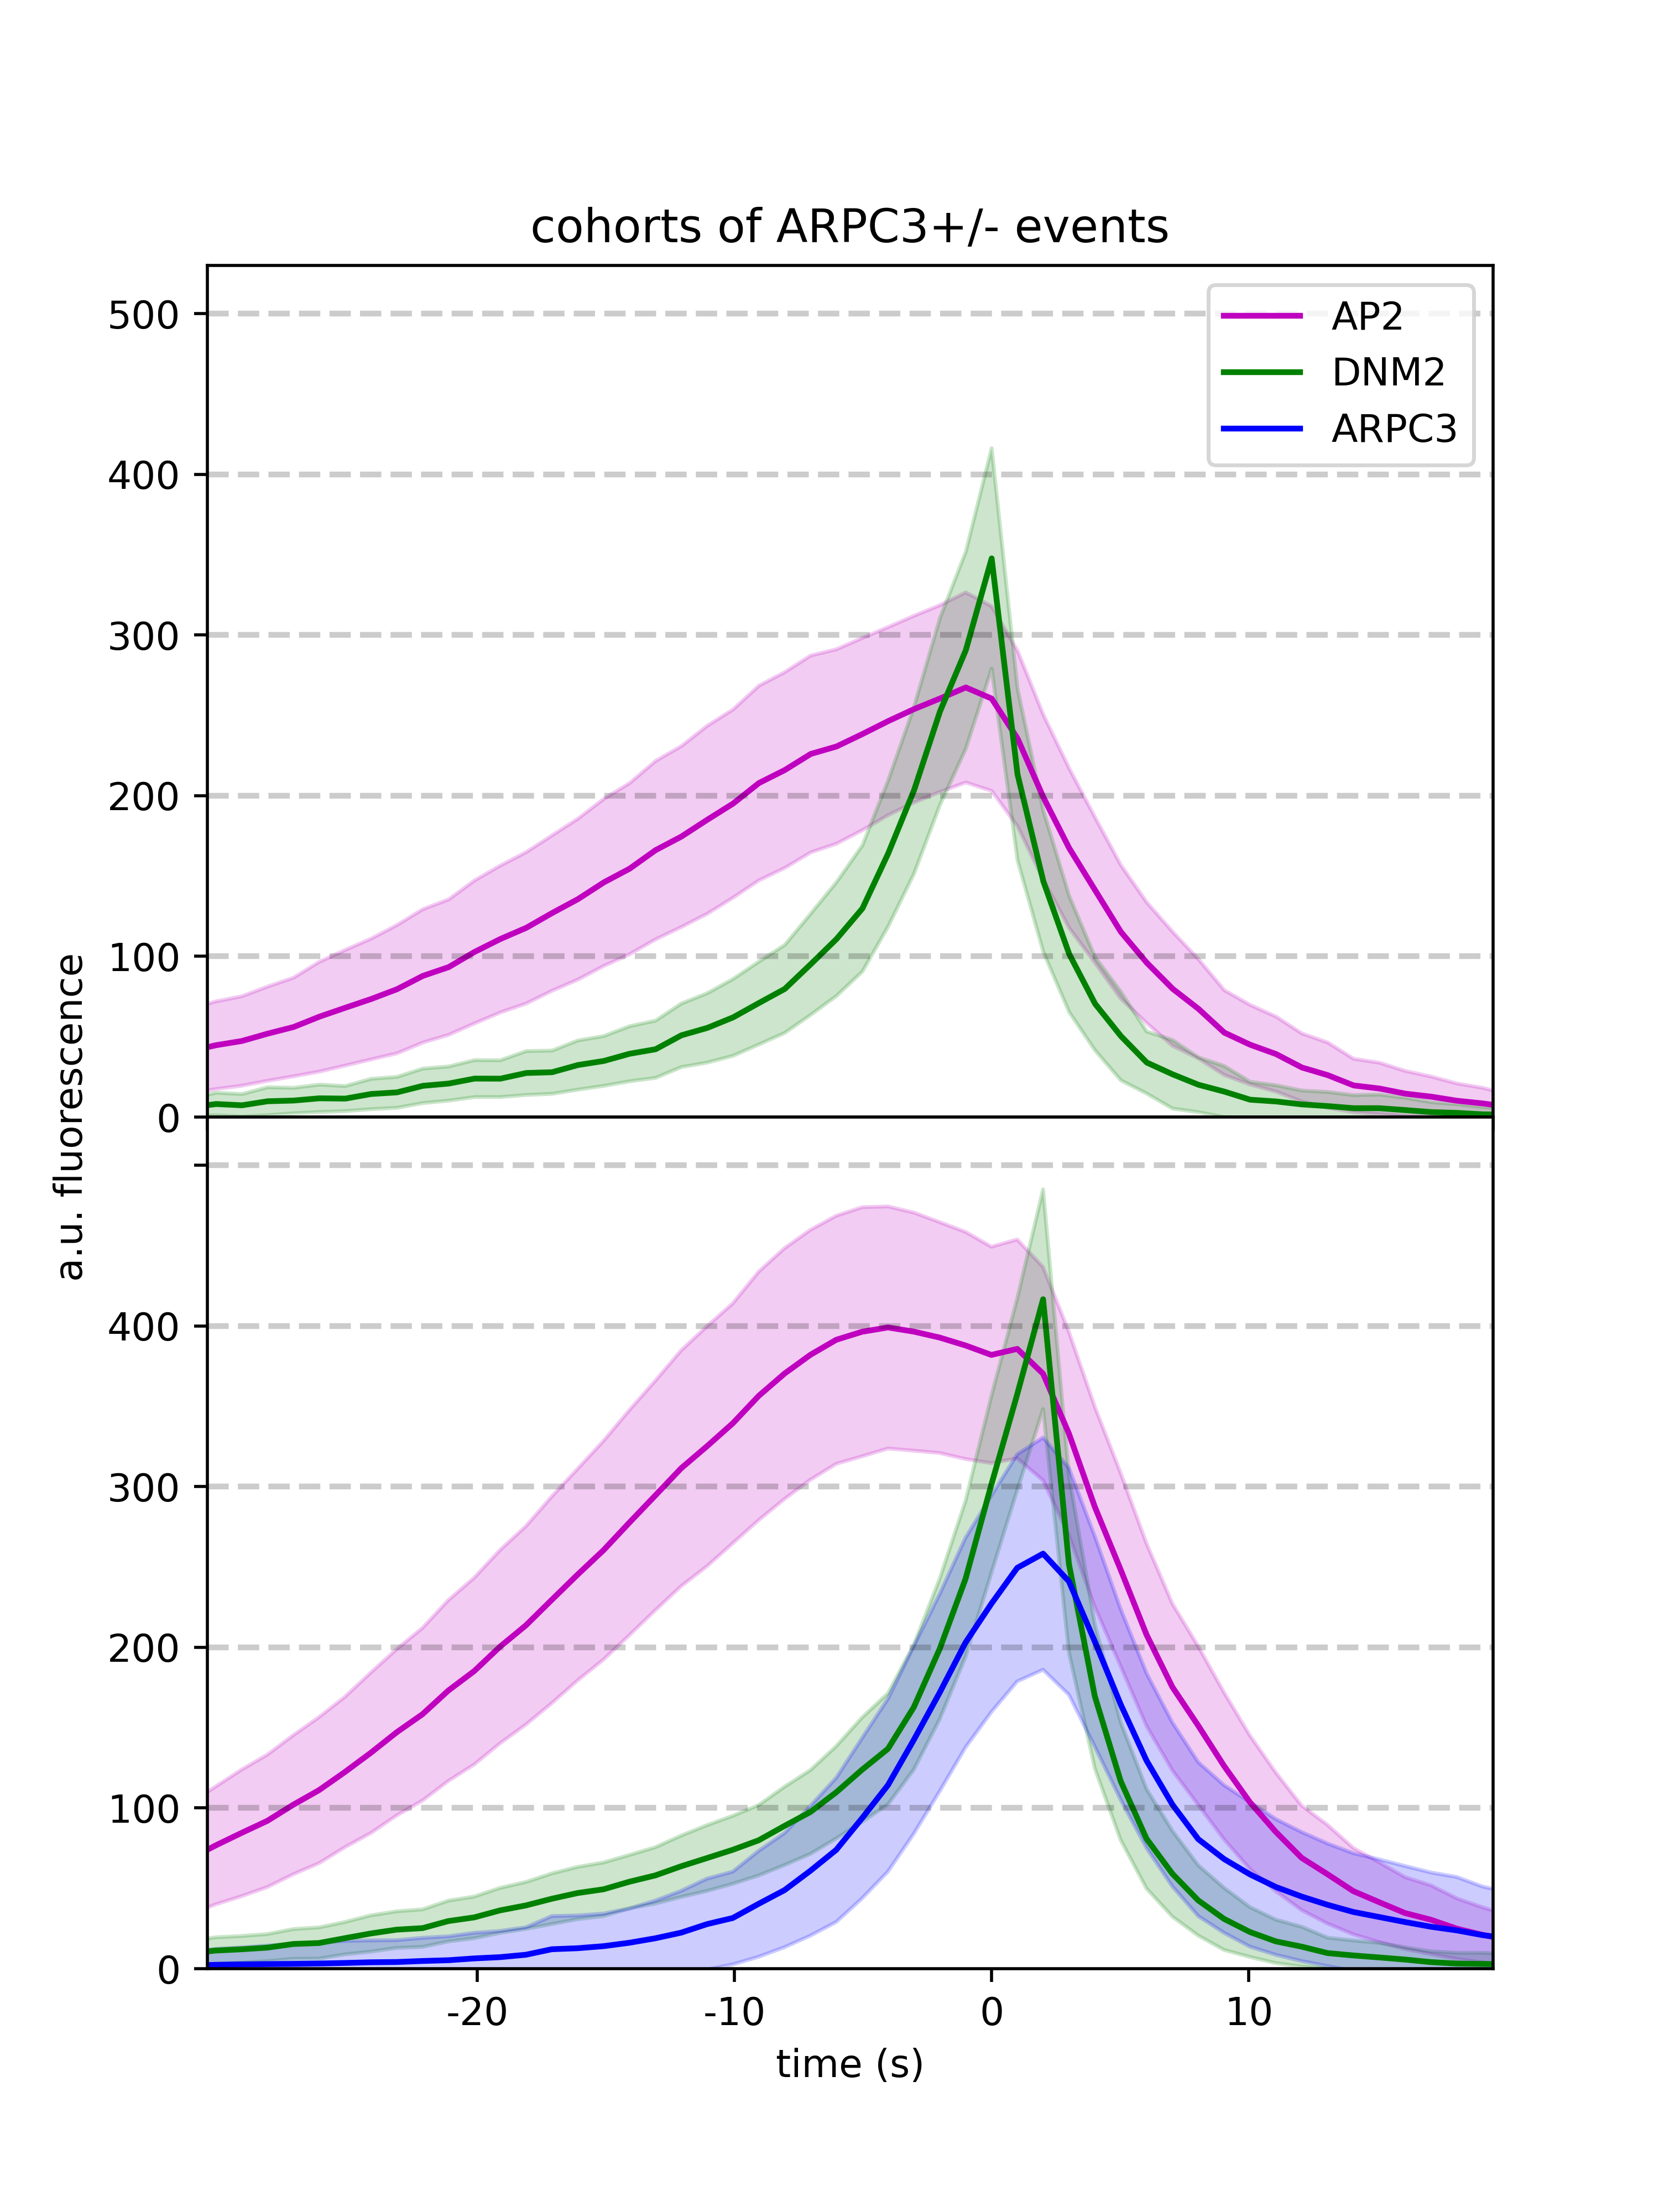

In [49]:
Image(filename=unique_user_saved_outputs+'/plots/fig_4b_all_overlaid_cohorts_sigdnm2peak_stacked_arpc3_no_distance_zeropadding.png', height=500, width=500)

# comparing ARPC3+/- aligned intensities with separations

In [21]:
%%capture

plt.style.use('default')
plt.rcParams['axes.spines.right'] = False

fig, (axes_0, axes_1) = plt.subplots(2, 1, dpi=500, figsize=(6,8), gridspec_kw=dict(height_ratios=[1,1]))
axes_separation_0 = axes_0.twinx()
axes_separation_1 = axes_1.twinx()




cohorts = [[min(ap2_lifetime_arpc3_negative), max(ap2_lifetime_arpc3_negative)]]

offsets, num_in_cohort, max_dnm2_cohort_indices_0 = display_tracks.plot_separated_cohorts([axes_0, axes_separation_0], 
                                                                         channel_amplitudes_arpc3_negative, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1], 
                                                                         [2], 
                                                                         ['AP2', 'DNM2', 'AP2-DNM2'],
                                                                         ['m', 'g', 'g'],
                                                                         line_cutoff_index=[2],
                                                                         line_cutoff_regions=[[], [], [[0, 92-10], [92+5, 120]]],
                                                                         horizontal_shift_index=[0, 1, 2, 3, 4], 
                                                                         horizontal_shift=[-92, -92, -92, -92, -92])                                                                           


cohorts = [[min(ap2_lifetime_arpc3_positive), max(ap2_lifetime_arpc3_positive)]]

_, _, max_dnm2_cohort_indices_1 = display_tracks.plot_separated_cohorts([axes_1, axes_separation_1], 
                                                                         channel_amplitudes_arpc3_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [3, 4], 
                                                                         ['AP2', 'DNM2', 'ARPC3', 'AP2-DNM2', 'AP2-ARPC3'],
                                                                         ['m', 'g', 'b', 'g', 'b'],
                                                                         line_cutoff_index=[3, 4],
                                                                         line_cutoff_regions=[[], [], [], [[0, 88-10], [88+5, 120]], [[0, 88-10], [88 +5, 120]]],
                                                                         horizontal_shift_index=[0, 1, 2, 3, 4], 
                                                                         horizontal_shift=[-88, -88, -88, -88, -88])


lines_0, labels_0 = axes_0.get_legend_handles_labels()
lines_1, labels_1 = axes_separation_0.get_legend_handles_labels()

axes_0.legend(lines_0+lines_1, labels_0+labels_1, 
            loc='upper right')

y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes_0.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)
    axes_1.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)

axes_1.set_xlabel('time (s)') 
axes_0.set_xlim([-30, 20]) 
axes_1.set_xlim([-30, 20]) 
axes_0.set_ylim([0,530])
axes_1.set_ylim([0,530])
axes_separation_0.set_ylim([0,0.5])
axes_separation_1.set_ylim([0,0.5])

axes_1.set_yticks([0,100,200,300,400, 500], minor=False)
axes_1.set_yticklabels([0,100,200,300, 400, 500], minor=False)
axes_0.set_yticks([0,100,200,300,400, 500], minor=False)
axes_0.set_yticklabels([0,100,200,300,400, 500], minor=False)

axes_separation_1.set_yticks([0, 0.1, 0.2, 0.3, 0.4], minor=False)
axes_separation_1.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4], minor=False)
axes_separation_0.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], minor=False)
axes_separation_0.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5], minor=False)

plt.setp(axes_0.get_xticklabels(), visible=False)
yticks = axes_1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
plt.subplots_adjust(hspace=.0)

axes_0.axvline(20, color='black', linewidth=5, linestyle='--')
axes_1.axvline(20, color='black', linewidth=5, linestyle='--')

axes_0.text(-36,0, 'a.u. fluorescence', rotation="vertical", va="center", fontsize=10);
axes_0.text(24,0, 'separation (microns)', rotation=270, va="center", fontsize=10);

axes_1.set_xticks(0.5+np.array([-20, -10, 0, 10]), minor=False)
axes_1.set_xticklabels([-20, -10, 0, 10], minor=False)

axes_0.set_title('cohorts of ARPC3+/- events')

plt.savefig(unique_user_saved_outputs+'/plots/all_overlaid_cohorts_sigdnm2_stacked_arpc3_zeropadding.png')

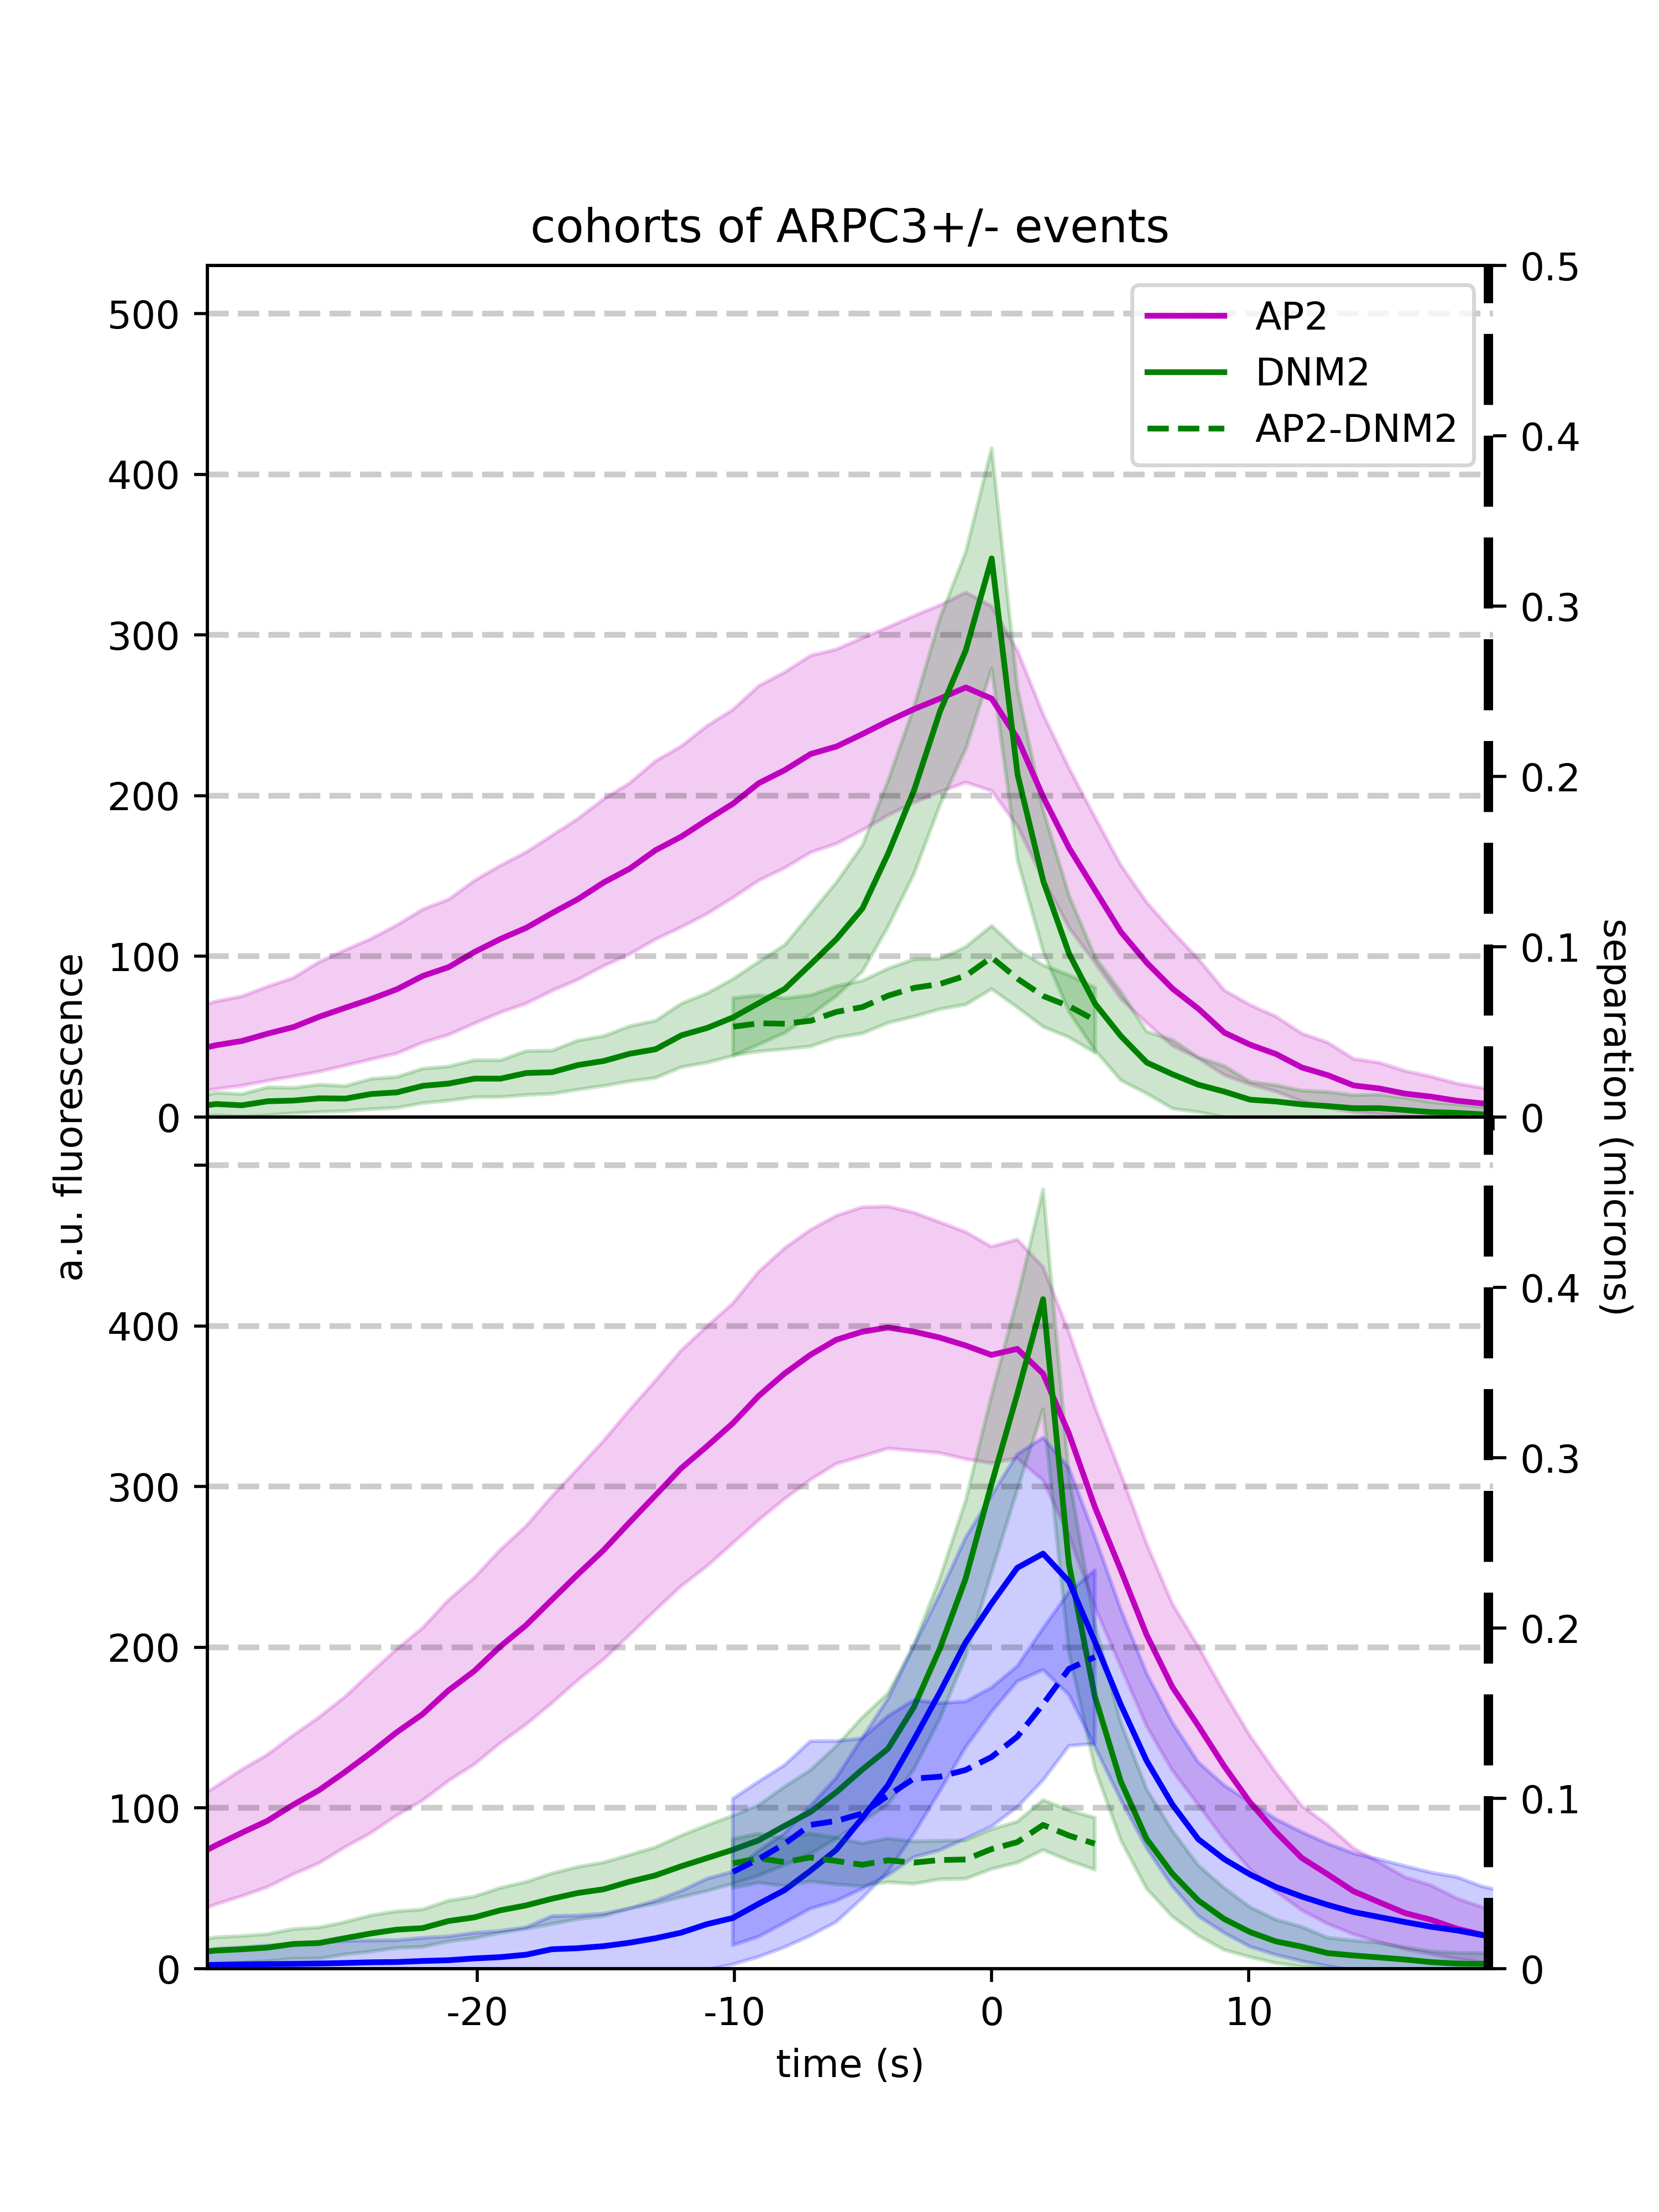

In [22]:
Image(filename=unique_user_saved_outputs+'/plots/all_overlaid_cohorts_sigdnm2_stacked_arpc3_zeropadding.png', height=500, width=500)

# calculating "straightness index" of tracks, +/- ARPC3

In [23]:
straightness_arpc3_positive_before = []
straightness_arpc3_negative_before = []

for i in range(len(ccps_arpc3_positive)):
    
    x_pos = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(ccps_arpc3_positive, i, 0)
    y_pos = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(ccps_arpc3_positive, i, 0)
    
    total_displacement = 0
    
    dnm2_peak = np.argmax(return_track_attributes.return_track_amplitude_no_buffer_channel(ccps_arpc3_positive, i, 1))
    
    try:

        span = range(dnm2_peak-10, dnm2_peak)
        
        for j in span:

                temp_disp = np.sqrt((x_pos[j+1]-x_pos[j])**2 + (y_pos[j+1]-y_pos[j])**2)

                total_displacement+=temp_disp
        
        end_to_end_displacement = np.sqrt((x_pos[span[-1]]-x_pos[span[0]])**2 + (y_pos[span[-1]]-y_pos[span[0]])**2)
        straightness_arpc3_positive_before.append(end_to_end_displacement/total_displacement)          
        
    except Exception:

        straightness_arpc3_positive_before.append(-1)

        

for i in range(len(ccps_arpc3_negative)):
    
    x_pos = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(ccps_arpc3_negative, i, 0)
    y_pos = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(ccps_arpc3_negative, i, 0)
    
    total_displacement = 0
    
    dnm2_peak = np.argmax(return_track_attributes.return_track_amplitude_no_buffer_channel(ccps_arpc3_negative, i, 1))
    
    try:

        span = range(dnm2_peak-10, dnm2_peak)
        
        for j in span:

                temp_disp = np.sqrt((x_pos[j+1]-x_pos[j])**2 + (y_pos[j+1]-y_pos[j])**2)

                total_displacement+=temp_disp
        
        end_to_end_displacement = np.sqrt((x_pos[span[-1]]-x_pos[span[0]])**2 + (y_pos[span[-1]]-y_pos[span[0]])**2)
        straightness_arpc3_negative_before.append(end_to_end_displacement/total_displacement)             
        
    except Exception:

        straightness_arpc3_negative_before.append(-1)
    
straightness_arpc3_negative_before = np.array(straightness_arpc3_negative_before)
straightness_arpc3_negative_before = straightness_arpc3_negative_before[np.where(straightness_arpc3_negative_before>0)[0]]
straightness_arpc3_positive_before = np.array(straightness_arpc3_positive_before)
straightness_arpc3_positive_before = straightness_arpc3_positive_before[np.where(straightness_arpc3_positive_before>0)[0]]

In [24]:
%%capture

straightness_arpc3_positive_after = []
straightness_arpc3_negative_after = []

for i in range(len(ccps_arpc3_positive)):
    
    x_pos = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(ccps_arpc3_positive, i, 0)
    y_pos = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(ccps_arpc3_positive, i, 0)
    
    total_displacement = 0
    
    dnm2_peak = np.argmax(return_track_attributes.return_track_amplitude_no_buffer_channel(ccps_arpc3_positive, i, 1))
    
    try:

        span = range(dnm2_peak, dnm2_peak+10)
        
        for j in span:

                temp_disp = np.sqrt((x_pos[j+1]-x_pos[j])**2 + (y_pos[j+1]-y_pos[j])**2)

                total_displacement+=temp_disp
        
        end_to_end_displacement = np.sqrt((x_pos[span[-1]]-x_pos[span[0]])**2 + (y_pos[span[-1]]-y_pos[span[0]])**2)
        straightness_arpc3_positive_after.append(end_to_end_displacement/total_displacement)          
        
    except Exception:

        straightness_arpc3_positive_after.append(-1)


for i in range(len(ccps_arpc3_negative)):
    
    x_pos = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(ccps_arpc3_negative, i, 0)
    y_pos = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(ccps_arpc3_negative, i, 0)
    
    total_displacement = 0
    
    dnm2_peak = np.argmax(return_track_attributes.return_track_amplitude_no_buffer_channel(ccps_arpc3_negative, i, 1))
    
    try:

        span = range(dnm2_peak, dnm2_peak+10)
        
        for j in span:

                temp_disp = np.sqrt((x_pos[j+1]-x_pos[j])**2 + (y_pos[j+1]-y_pos[j])**2)

                total_displacement+=temp_disp
        
        end_to_end_displacement = np.sqrt((x_pos[span[-1]]-x_pos[span[0]])**2 + (y_pos[span[-1]]-y_pos[span[0]])**2)
        straightness_arpc3_negative_after.append(end_to_end_displacement/total_displacement)             
        
    except Exception:

        straightness_arpc3_negative_after.append(-1)
    
straightness_arpc3_negative_after = np.array(straightness_arpc3_negative_after)
straightness_arpc3_negative_after = straightness_arpc3_negative_after[np.where(straightness_arpc3_negative_after>0)[0]]
straightness_arpc3_positive_after = np.array(straightness_arpc3_positive_after)
straightness_arpc3_positive_after = straightness_arpc3_positive_after[np.where(straightness_arpc3_positive_after>0)[0]]

In [50]:
%%capture
plt.figure(dpi=500)
plt.hist(straightness_arpc3_negative_before, bins='auto', color='blue', alpha=1, log=False, cumulative=True, histtype='step', density=True, label='ARPC3-, before scission');
plt.hist(straightness_arpc3_positive_before, bins='auto', color='orange', alpha=1, log=False, cumulative=True, histtype='step', density=True, label='ARPC3+, before scission');
plt.hist(straightness_arpc3_negative_after, linestyle='--', bins='auto', color='blue', alpha=1, log=False, cumulative=True, histtype='step', density=True, label='ARPC3-, after scission');
plt.hist(straightness_arpc3_positive_after, linestyle='--', bins='auto', color='orange', alpha=1, log=False, cumulative=True, histtype='step', density=True, label='ARPC3+, after scission');
plt.xlabel('straightness-index')
plt.ylabel('cumulative frequency')
plt.legend(loc='upper left')
plt.title('straightness-index = \n(end-to-end displacement)/(sum of step-wise displacements)\n--->over times defined in interval')
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/fig_4d_straightness_index_merged_zero_sig.png')

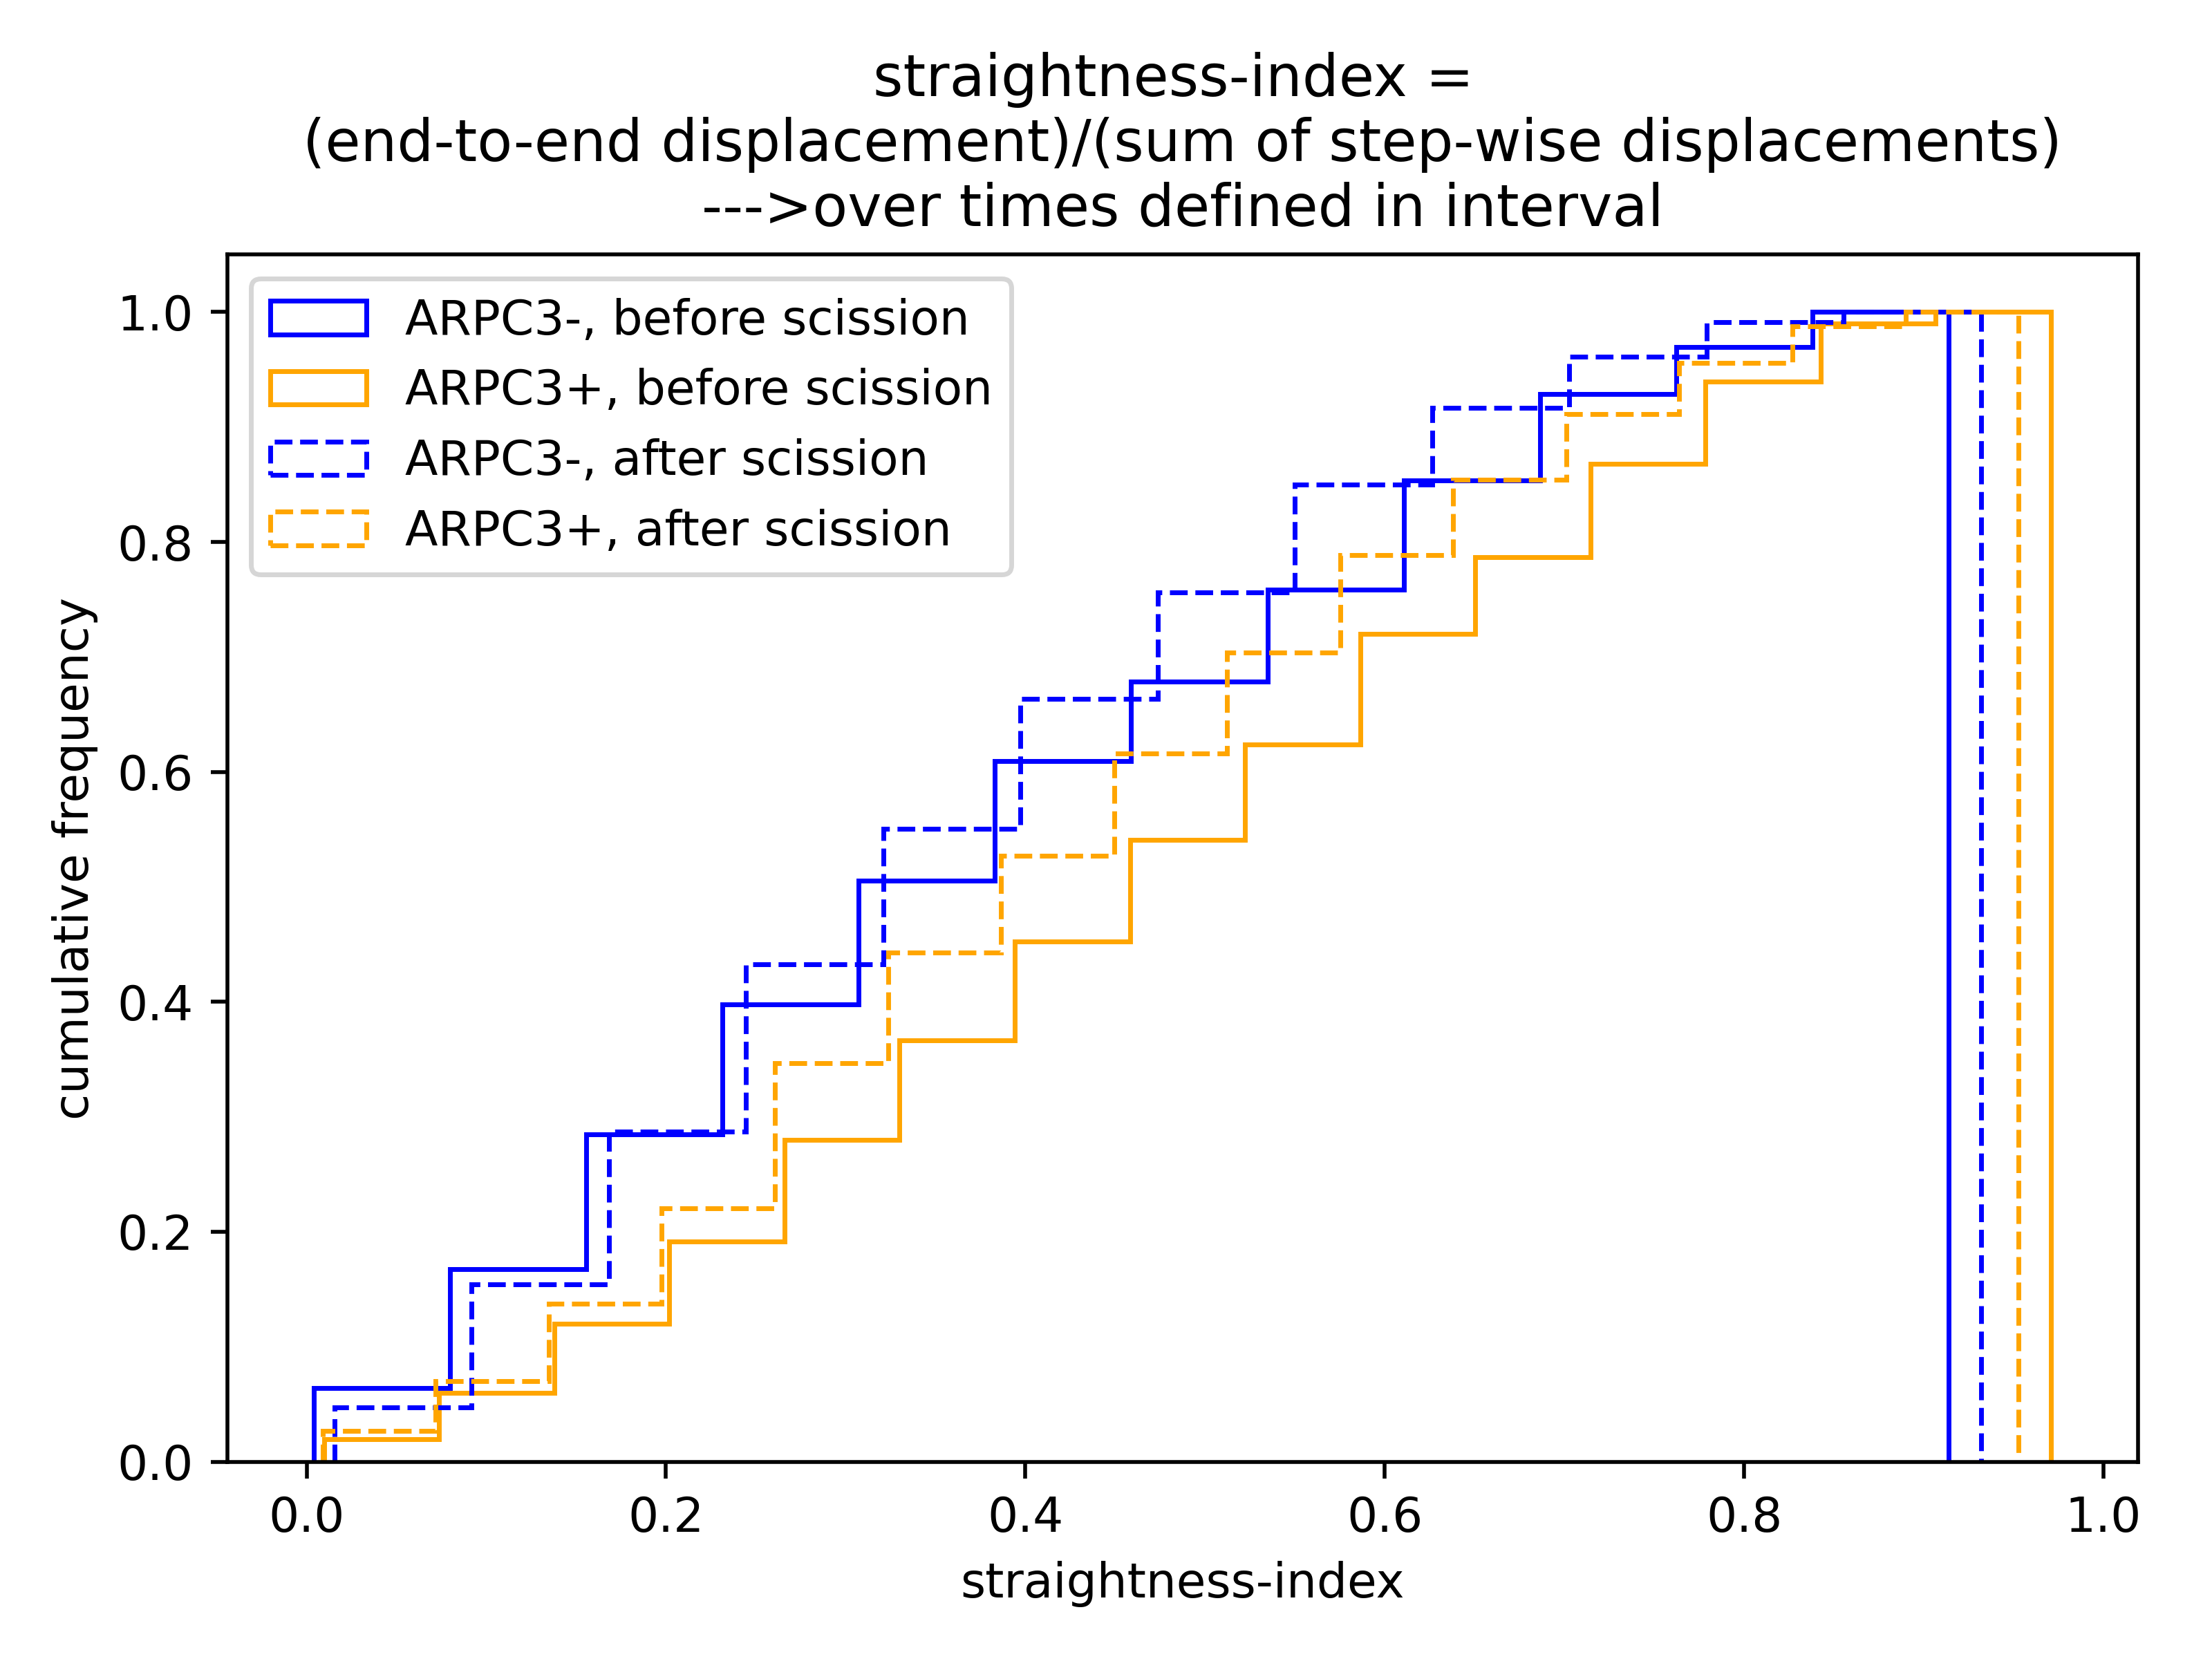

In [51]:
Image(filename=unique_user_saved_outputs+'/plots/fig_4d_straightness_index_merged_zero_sig.png', height=500, width=500)

In [98]:
merged_straightness = straightness_arpc3_negative_before.flatten()
merged_straightness = np.concatenate((merged_straightness, straightness_arpc3_negative_after.flatten()))
merged_straightness = np.concatenate((merged_straightness, straightness_arpc3_positive_before.flatten()))
merged_straightness = np.concatenate((merged_straightness, straightness_arpc3_positive_after.flatten()))

labels = [0 for _ in range(len(straightness_arpc3_negative_before))]
labels += [1 for _ in range(len(straightness_arpc3_negative_after))]
labels += [2 for _ in range(len(straightness_arpc3_positive_before))]
labels += [4 for _ in range(len(straightness_arpc3_positive_after))]

merged_data_straightness = np.array((merged_straightness, labels)).T

df_straightness = pd.DataFrame(data=merged_data_straightness, columns=['straightness', 'position'])

In [126]:
%%capture
plt.rcParams['figure.dpi'] = 500
ax = sns.boxplot(data=df_straightness, x='position', y='straightness')
box0 = ax.artists[0]
box0.set_facecolor('blue')
box1 = ax.artists[1]
box1.set_facecolor('blue')
box2 = ax.artists[2]
box2.set_facecolor('orange')
box3 = ax.artists[3]
box3.set_facecolor('orange')

ax.set_xticklabels(['ARPC3-\nbefore',
                    'ARPC3-\nafter',
                    'ARPC3+\nbefore',
                    'ARPC3+\nafter']);
ax.set_xlabel('ARPC3 recruitment +/-, timing relative to scission')
plt.tight_layout()
plt.savefig(unique_user_saved_outputs+'/plots/fig_4d_boxplot_straightness_index_merged_zero_sig.png')

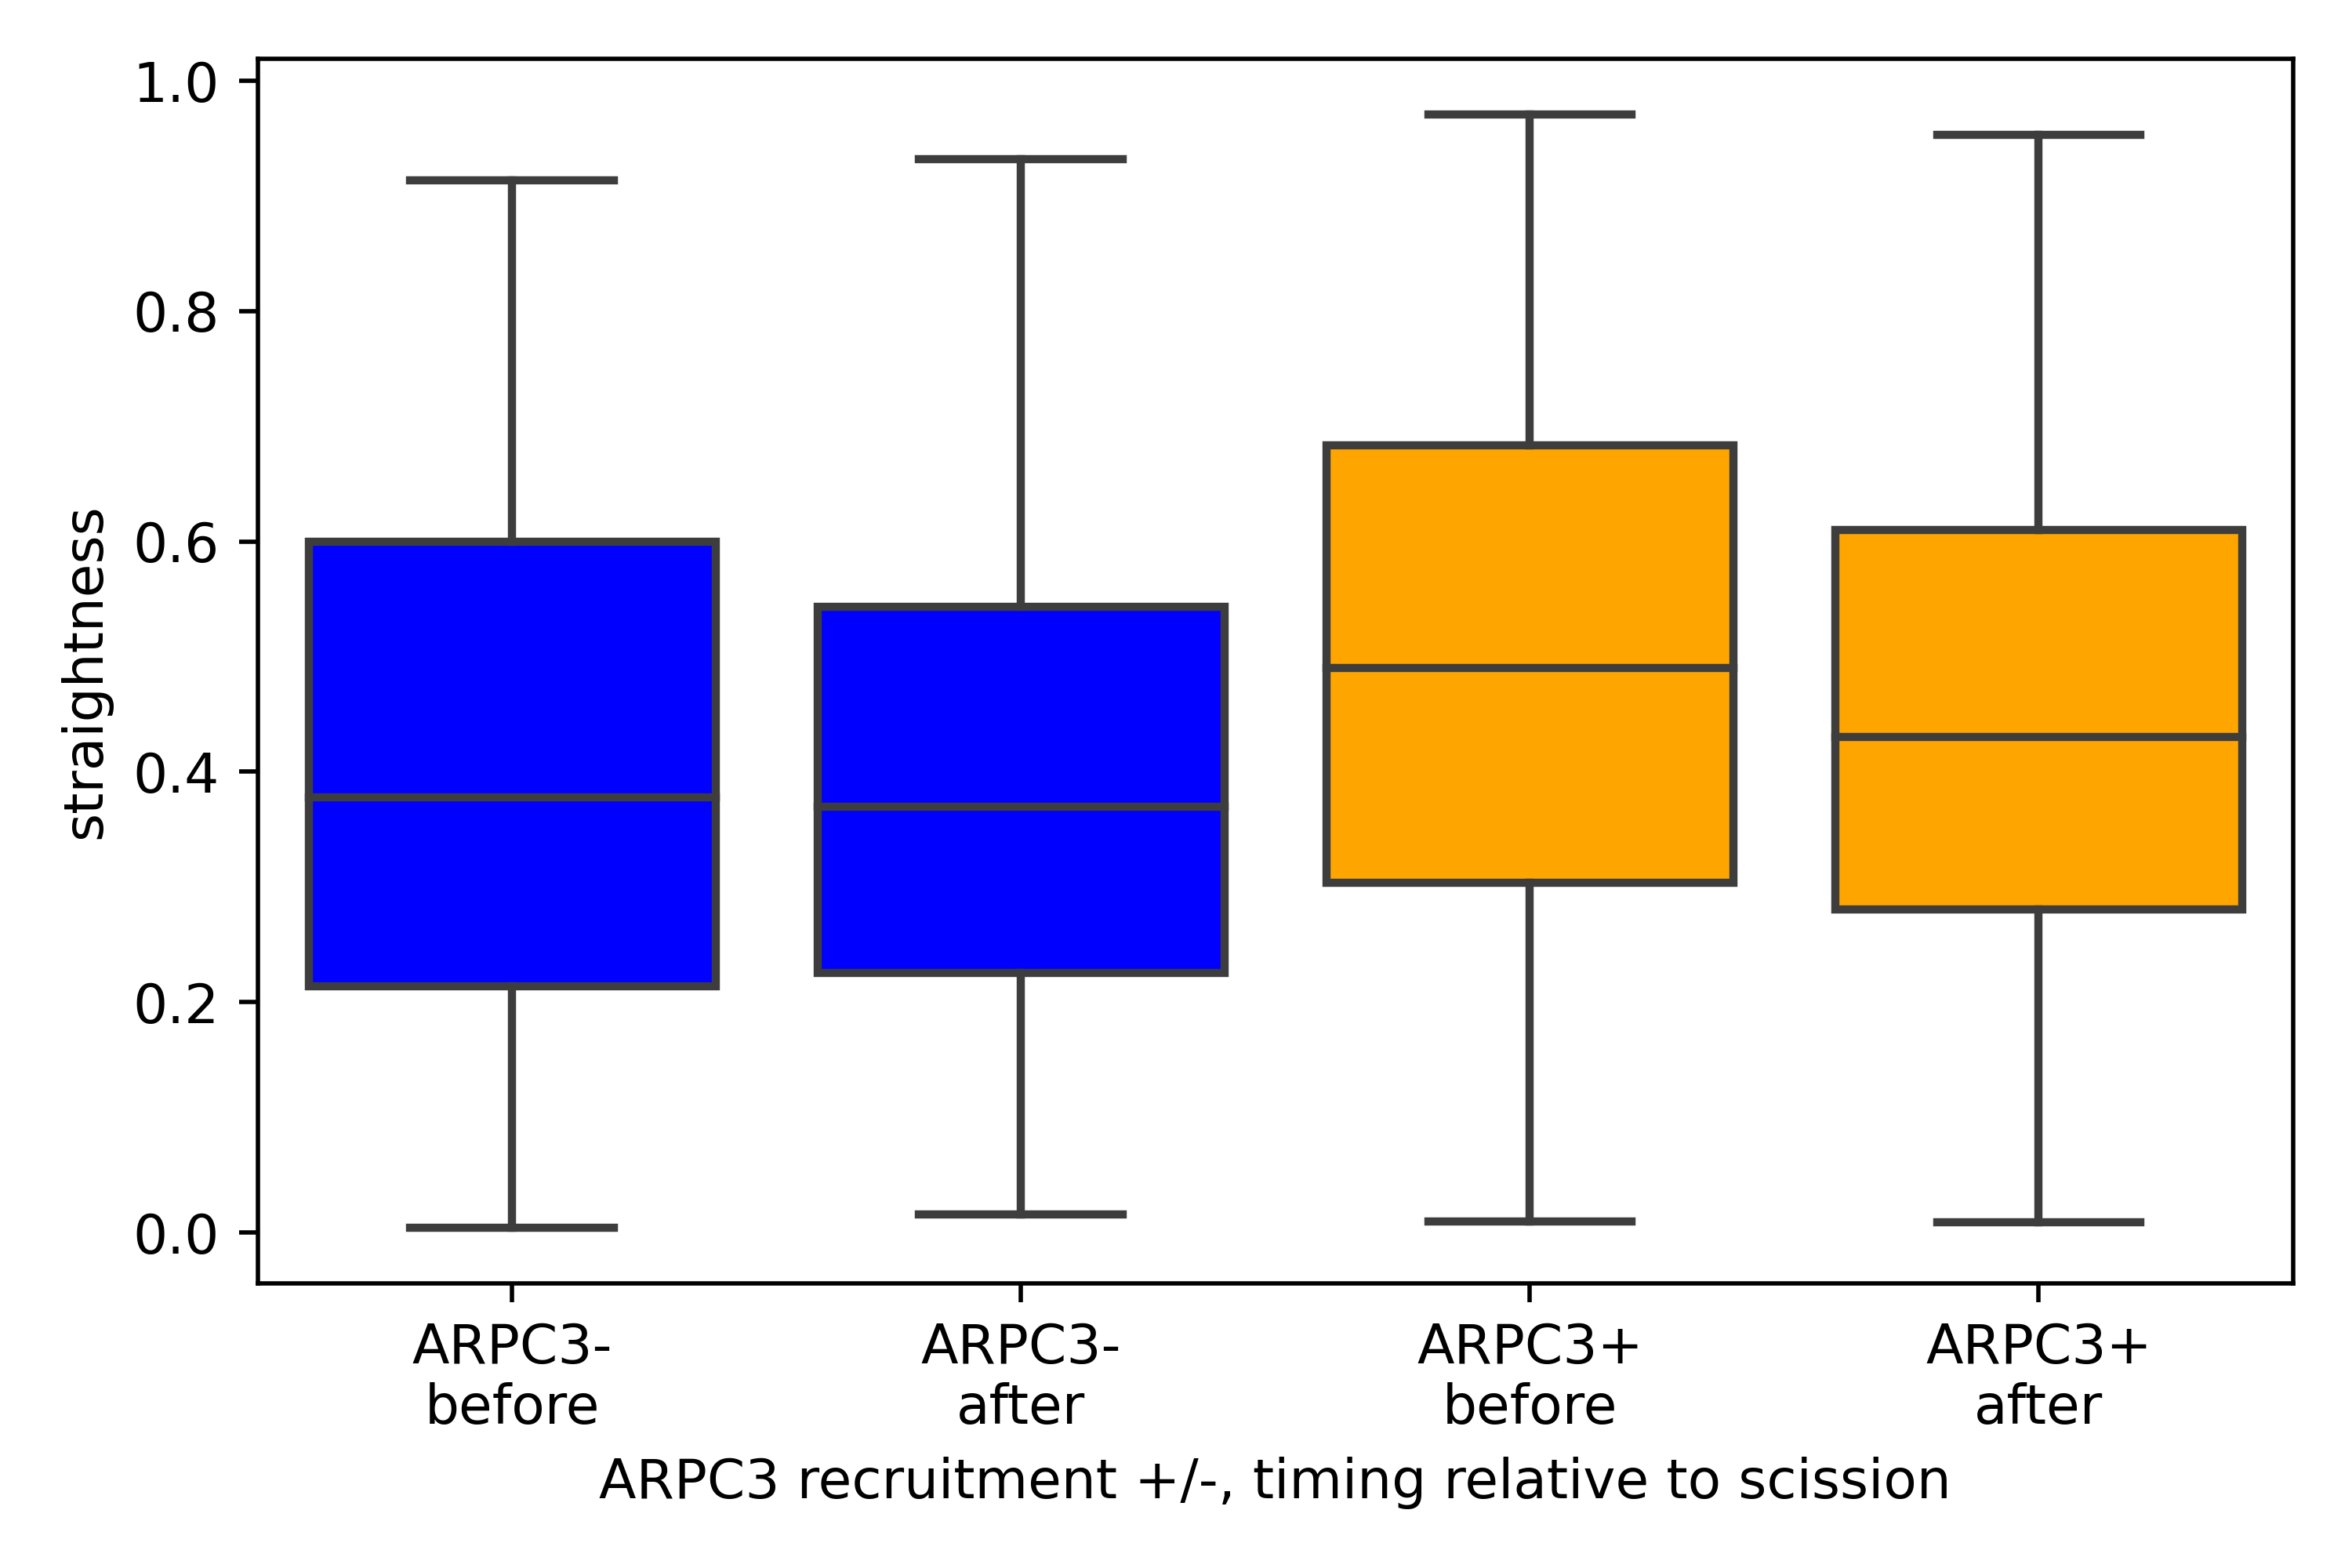

In [127]:
Image(filename=unique_user_saved_outputs+'/plots/fig_4d_boxplot_straightness_index_merged_zero_sig.png', height=500, width=500)